In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_rows = 999
pd.options.display.max_columns = 999 

# Upload do banco

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/My Drive/MIA/BilheteriaObrasSemana2.csv', encoding = 'ISO-8859-1', sep = ';', index_col=0)

df.head()

,titulo_original,publico,tempo_exibicao,renda,salas,copias,ano_cinematografico,razao_social_distribuidora,internacional_nacional,genero
0,OS DEZ MANDAMENTOS,11305479,222 days,1.168330e+08,7319,263,2016,SM DISTRIBUIDORA DE FILMES LTDA,1,Ficção
1,TROPA DE ELITE 2,11146723,168 days,1.034612e+08,6240,5674,2011,ZAZEN PRODUÇÕES AUDIOVISUAIS LTDA.,1,Ficção
2,THE AVENGERS,10911371,132 days,1.295956e+08,6693,4043,2012,THE WALT DISNEY COMPANY (BRASIL) LTDA.,0,Ficção
3,THE AVENGERS: AGE OF ULTRON,10129071,132 days,1.461849e+08,7881,7881,2015,THE WALT DISNEY COMPANY (BRASIL) LTDA.,0,Ficção
4,FURIOUS SEVEN,9857968,138 days,1.424660e+08,5961,5961,2016,COLUMBIA TRISTAR FILMES DO BRASIL LTDA,0,Ficção


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3870 entries, 0 to 3869
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   titulo_original             3870 non-null   object 
 1   publico                     3870 non-null   int64  
 2   renda                       3870 non-null   float64
 3   salas                       3870 non-null   int64  
 4   copias                      3870 non-null   int64  
 5   ano_cinematografico         3870 non-null   int64  
 6   razao_social_distribuidora  3870 non-null   object 
 7   internacional_nacional      3870 non-null   object 
 8   genero                      3870 non-null   object 
 9   tempo_exibicao2             3870 non-null   int64  
 10  distribuidoras2             3870 non-null   object 
 11  rendacat                    3870 non-null   object 
 12  rendabinaria                3870 non-null   object 
 13  rendpercap                  3869 

# Feature engineering

* Tempo de exibição em formato numérico (dias)
* Labels para internacional_nacional
* Agrupamento das distribuidoras em 3 categorias (alta, média e baixa renda),  segundo o rendimento arrecadado ao longo do período
* Criação de duas categorizações de renda: detalhada e binária.

In [ ]:
df['tempo_exibicao2'] = df['tempo_exibicao'].str.split(' ').str[0]
df.head(2)

,titulo_original,publico,tempo_exibicao,renda,salas,copias,ano_cinematografico,razao_social_distribuidora,internacional_nacional,genero,tempo_exibicao2
0,OS DEZ MANDAMENTOS,11305479,222 days,1.168330e+08,7319,263,2016,SM DISTRIBUIDORA DE FILMES LTDA,1,Ficção,222
1,TROPA DE ELITE 2,11146723,168 days,1.034612e+08,6240,5674,2011,ZAZEN PRODUÇÕES AUDIOVISUAIS LTDA.,1,Ficção,168


In [ ]:
df['tempo_exibicao2'] = df['tempo_exibicao2'].astype(int)

In [ ]:
df.drop(columns=['tempo_exibicao'], inplace=True)
df.head(2)

,titulo_original,publico,renda,salas,copias,ano_cinematografico,razao_social_distribuidora,internacional_nacional,genero,tempo_exibicao2
0,OS DEZ MANDAMENTOS,11305479,1.168330e+08,7319,263,2016,SM DISTRIBUIDORA DE FILMES LTDA,1,Ficção,222
1,TROPA DE ELITE 2,11146723,1.034612e+08,6240,5674,2011,ZAZEN PRODUÇÕES AUDIOVISUAIS LTDA.,1,Ficção,168


In [ ]:
df["internacional_nacional"] = df["internacional_nacional"].replace({
      0 : "Internacional"
    , 1 : "Nacional"
})
df.head(2)

,titulo_original,publico,renda,salas,copias,ano_cinematografico,razao_social_distribuidora,internacional_nacional,genero,tempo_exibicao2
0,OS DEZ MANDAMENTOS,11305479,1.168330e+08,7319,263,2016,SM DISTRIBUIDORA DE FILMES LTDA,Nacional,Ficção,222
1,TROPA DE ELITE 2,11146723,1.034612e+08,6240,5674,2011,ZAZEN PRODUÇÕES AUDIOVISUAIS LTDA.,Nacional,Ficção,168


In [ ]:
df['razao_social_distribuidora'].nunique()

273

In [ ]:
dist_dict = {
'UNIVERSAL PICTURES INTERNATIONAL BRAZIL LTDA.': 'major', #major: acima de 10 Mi#
'THE WALT DISNEY COMPANY (BRASIL) LTDA.': 'major',
'ZAZEN PRODUÇÕES AUDIOVISUAIS LTDA.': 'major',
'FOX FILM DO BRASIL LTDA': 'major',
'WARNER BROS. (SOUTH) INC.': 'major',
'PARAMOUNT PICTURES BRASIL DISTRIBUIDORA DE FILMES LTDA': 'major',
'COLUMBIA TRISTAR FILMES DO BRASIL LTDA': 'media', #media: de 1 até 10 Mi#
'FREESPIRIT DISTRIBUIDORA DE FILMES LTDA.': 'media',
'SM DISTRIBUIDORA DE FILMES LTDA': 'media',
'CANZION DO BRASIL LTDA': 'media',
'H2O DISTRIBUIDORA DE FILMES LTDA': 'media',
'WMIX DISTRIBUIDORA LTDA.': 'media',
'DIAMOND FILMS DO BRASIL PRODUÇÃO E DISTRIBUIÇÃO AUDIOVISUAL LTDA.': 'media',
'PLAYARTE PICTURES ENTRETENIMENTOS LTDA.': 'media',
'GRAÇA FILMES PRODUTORA E DISTRIBUIDORA LTDA': 'media',
'ELIMAR PRODUÇÕES ARTÍSTICAS LTDA': 'media',
'CUATRO DAMAS FILMES LTDA.': 'media',
'CANNES PRODUÇÕES S/A': 'media',
'CHATO LTDA': 'media'
}
# O valor de corte faz referência aos rendimentos médios das distribuidoras, conforme tabela acima. Major: rendimento médio para todo o período acima de 10 milhões de reais;
# Média: rendimento médio de 1 até 10 milhões de reais;
# Menores: rendimento médio abaixo de 1 milhão de reais.

df['distribuidoras2'] = df['razao_social_distribuidora'].map(dist_dict).fillna('menores')
df.head(3)

,titulo_original,publico,renda,salas,copias,ano_cinematografico,razao_social_distribuidora,internacional_nacional,genero,tempo_exibicao2,distribuidoras2
0,OS DEZ MANDAMENTOS,11305479,1.168330e+08,7319,263,2016,SM DISTRIBUIDORA DE FILMES LTDA,Nacional,Ficção,222,media
1,TROPA DE ELITE 2,11146723,1.034612e+08,6240,5674,2011,ZAZEN PRODUÇÕES AUDIOVISUAIS LTDA.,Nacional,Ficção,168,major
2,THE AVENGERS,10911371,1.295956e+08,6693,4043,2012,THE WALT DISNEY COMPANY (BRASIL) LTDA.,Internacional,Ficção,132,major


#### Descrição

In [ ]:
pd.set_option('display.float_format', lambda x: '%.9f' % x)
df.describe(percentiles = [.01, .05, .25, .5, .75, .95, .99])

,publico,renda,salas,copias,ano_cinematografico,tempo_exibicao2
count,3870.000000000,3870.000000000,3870.000000000,3870.000000000,3870.000000000,3870.000000000
mean,356853.985529716,4308007.604987080,508.650904393,448.698191214,2013.656072351,79.312144703
std,1062035.766056742,13368715.106647801,1080.468252282,983.837254040,2.678867854,59.764219527
min,0.000000000,0.000000000,1.000000000,1.000000000,2009.000000000,6.000000000
1%,24.000000000,140.970000000,1.000000000,1.000000000,2009.000000000,6.000000000
5%,167.350000000,1189.346000000,3.000000000,3.000000000,2009.000000000,12.000000000
25%,2474.500000000,25963.087500000,25.000000000,23.000000000,2011.000000000,36.000000000
50%,15330.500000000,180637.750000000,84.000000000,73.000000000,2014.000000000,72.000000000
75%,143373.000000000,1703856.472500000,405.000000000,354.750000000,2016.000000000,108.000000000
95%,2106863.349999999,24655262.260499965,2754.050000000,2307.550000000,2017.000000000,186.000000000


In [ ]:
altissimo = len(df[(df['renda'] > 25000000)])
alto = len(df[(df['renda'] <= 25000000) & (df['renda'] > 10000000)])
medio = len(df[(df['renda'] <= 10000000) & (df['renda'] > 1000000)])
baixo = len(df[(df['renda' ] <= 1000000) & (df['renda'] >= 500000)])
baixissimo = len(df[(df['renda'] < 500000)])
print('Altíssimo', altissimo)
print('Alto', alto)
print('Médio', medio)
print('Baixo', baixo)
print('Baixíssimo', baixissimo)

Altíssimo 189
Alto 198
Médio 787
Baixo 271
Baixíssimo 2425


In [ ]:
alto = len(df[(df['renda'] >= 1000000)])
baixo = len(df[(df['renda'] < 1000000)])
print(alto)
print(baixo)

1174
2696


In [ ]:
conditions = [
    (df['renda'] > 25000000),
    (df['renda'] <= 25000000) & (df['renda'] > 10000000),
    (df['renda'] <= 10000000) & (df['renda'] > 1000000),
    (df['renda'] <= 1000000) & (df['renda'] >= 500000),
    (df['renda'] < 500000)
]

values = ['altissmo', 'alto', 'medio', 'baixo', 'baixissimo']

df['rendacat'] = np.select(conditions, values)

df.head(2)

,titulo_original,publico,renda,salas,copias,ano_cinematografico,razao_social_distribuidora,internacional_nacional,genero,tempo_exibicao2,distribuidoras2,rendacat
0,OS DEZ MANDAMENTOS,11305479,116833026.879999995,7319,263,2016,SM DISTRIBUIDORA DE FILMES LTDA,Nacional,Ficção,222,media,altissmo
1,TROPA DE ELITE 2,11146723,103461153.739999995,6240,5674,2011,ZAZEN PRODUÇÕES AUDIOVISUAIS LTDA.,Nacional,Ficção,168,major,altissmo


In [ ]:
df['rendacat'].value_counts()

baixissimo    2425
medio          787
baixo          271
alto           198
altissmo       189
Name: rendacat, dtype: int64

In [ ]:
conditions = [
    (df['renda'] > 1000000),
    (df['renda'] <= 1000000)
]

values = ['alto', 'baixo']

df['rendabinaria'] = np.select(conditions, values)

df.head(2)

,titulo_original,publico,renda,salas,copias,ano_cinematografico,razao_social_distribuidora,internacional_nacional,genero,tempo_exibicao2,distribuidoras2,rendacat,rendabinaria
0,OS DEZ MANDAMENTOS,11305479,116833026.879999995,7319,263,2016,SM DISTRIBUIDORA DE FILMES LTDA,Nacional,Ficção,222,media,altissmo,alto
1,TROPA DE ELITE 2,11146723,103461153.739999995,6240,5674,2011,ZAZEN PRODUÇÕES AUDIOVISUAIS LTDA.,Nacional,Ficção,168,major,altissmo,alto


In [ ]:
df['rendabinaria'].value_counts()

baixo    2696
alto     1174
Name: rendabinaria, dtype: int64

# Análise exploratória para modelagem

- Aprofundamento do comportamento dos dados;
- Análise com categorias de renda mais detalhadas e mais simples;
- Insights adicionais: relação de nacionalidade e tipo de distribuidora por gênero.


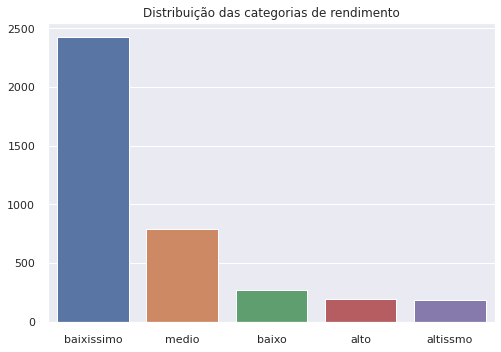

In [ ]:
sns.set(style='darkgrid')
sns.countplot(x = 'rendacat',
              data = df,
              order = 
              df['rendacat'].value_counts().index)
plt.xlabel("")
plt.ylabel("")
plt.title("Distribuição das categorias de rendimento")
plt.show()

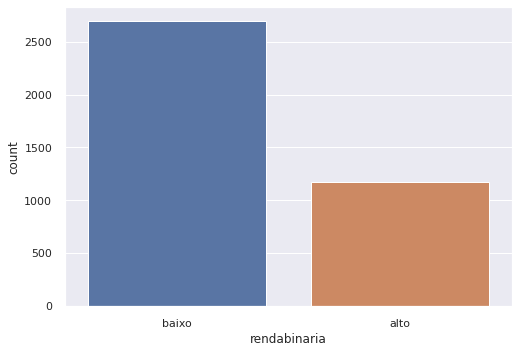

In [ ]:
sns.set(style='darkgrid')
sns.countplot(x = 'rendabinaria',
              data = df,
              order = 
              df['rendabinaria'].value_counts().index)
plt.show()



---



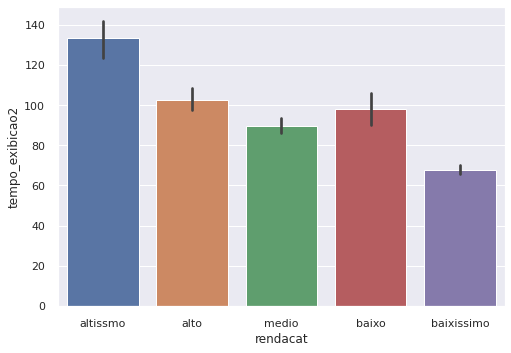

In [ ]:
sns.barplot(x = 'rendacat', y = 'tempo_exibicao2', data = df)
plt.show()

In [ ]:
df.groupby('rendacat')['tempo_exibicao2'].mean().sort_values(ascending=False)

rendacat
altissmo     133.211640212
alto         102.671717172
baixo         97.929889299
medio         89.674714104
baixissimo    67.760412371
Name: tempo_exibicao2, dtype: float64

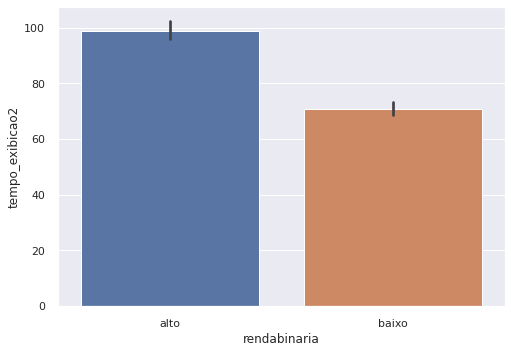

In [ ]:
sns.barplot(x = 'rendabinaria', y = 'tempo_exibicao2', data = df)
plt.show()

In [ ]:
df.groupby('rendabinaria')['tempo_exibicao2'].mean().sort_values(ascending=False)

rendabinaria
alto    98.875638842
baixo   70.793026706
Name: tempo_exibicao2, dtype: float64

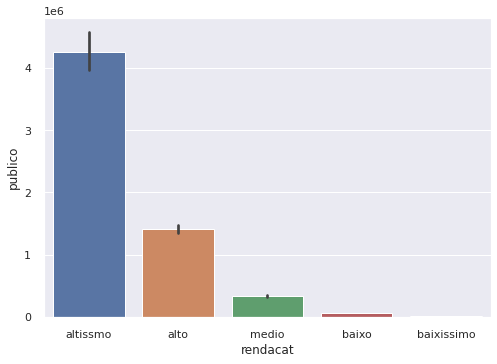

In [ ]:
sns.barplot(x = 'rendacat', y = 'publico', data = df)
plt.show()

In [ ]:
df.groupby('rendacat')['publico'].mean().sort_values(ascending=False)

rendacat
altissmo     4258438.719576719
alto         1408528.393939394
medio         329458.125794155
baixo          61619.136531365
baixissimo      8787.238350515
Name: publico, dtype: float64

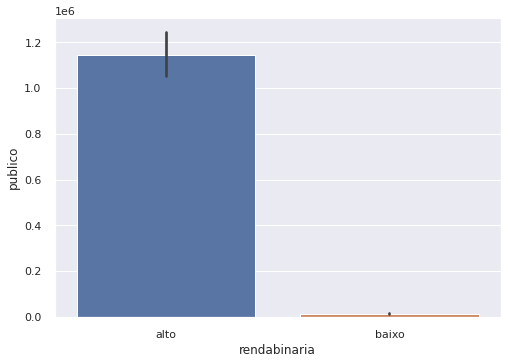

In [ ]:
sns.barplot(x = 'rendabinaria', y = 'publico', data = df)
plt.show()

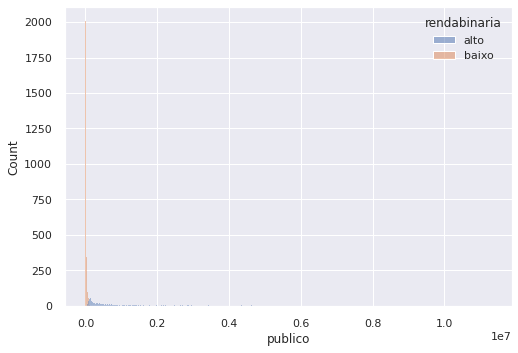

In [ ]:
sns.histplot(x = 'publico', hue = 'rendabinaria', data = df)
plt.show()

In [ ]:
df.groupby('rendabinaria')['publico'].mean()

rendabinaria
alto    1143966.852640545
baixo     14097.863130564
Name: publico, dtype: float64

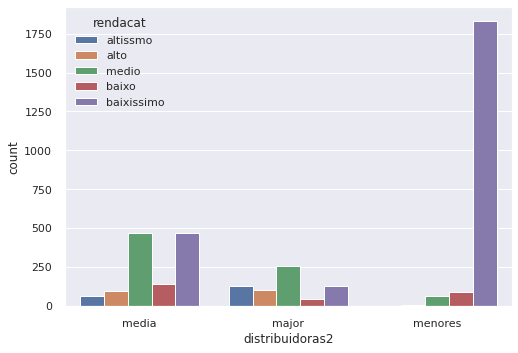

In [ ]:
sns.countplot(x = 'distribuidoras2', hue = 'rendacat', data = df)
plt.show()

In [ ]:
df.groupby('rendacat')['distribuidoras2'].value_counts()

rendacat    distribuidoras2
altissmo    major               127
            media                62
alto        major               100
            media                95
            menores               3
baixissimo  menores            1831
            media               468
            major               126
baixo       media               140
            menores              90
            major                41
medio       media               465
            major               257
            menores              65
Name: distribuidoras2, dtype: int64

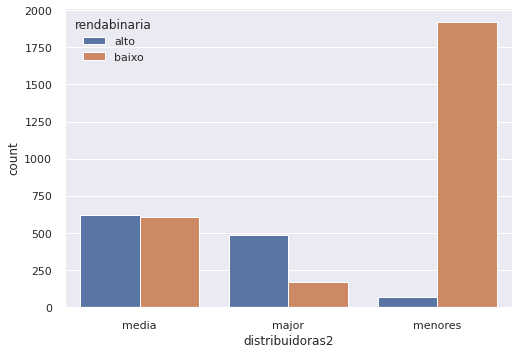

In [ ]:
sns.countplot(x = 'distribuidoras2', hue = 'rendabinaria', data = df)
plt.show()

In [ ]:
df.groupby('rendabinaria')['distribuidoras2'].value_counts()

rendabinaria  distribuidoras2
alto          media               622
              major               484
              menores              68
baixo         menores            1921
              media               608
              major               167
Name: distribuidoras2, dtype: int64

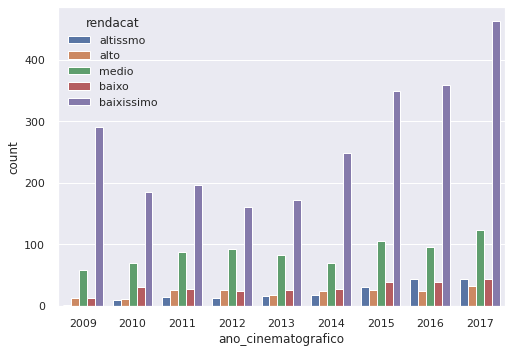

In [ ]:
sns.countplot(x = 'ano_cinematografico', hue = 'rendacat', data = df)
plt.show()

In [ ]:
df.groupby('rendacat')['ano_cinematografico'].value_counts()

rendacat    ano_cinematografico
altissmo    2016                    44
            2017                    43
            2015                    30
            2014                    17
            2013                    16
            2011                    15
            2012                    13
            2010                     9
            2009                     2
alto        2017                    32
            2012                    26
            2015                    26
            2011                    25
            2014                    24
            2016                    24
            2013                    17
            2009                    13
            2010                    11
baixissimo  2017                   463
            2016                   359
            2015                   349
            2009                   291
            2014                   248
            2011                   197
            2010                

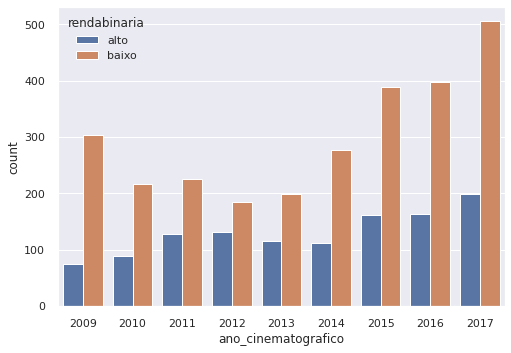

In [ ]:
sns.countplot(x = 'ano_cinematografico', hue = 'rendabinaria', data = df)
plt.show()

In [ ]:
df.groupby('rendabinaria')['ano_cinematografico'].value_counts()

rendabinaria  ano_cinematografico
alto          2017                   198
              2016                   164
              2015                   162
              2012                   132
              2011                   128
              2013                   116
              2014                   111
              2010                    89
              2009                    74
baixo         2017                   506
              2016                   398
              2015                   388
              2009                   304
              2014                   276
              2011                   225
              2010                   216
              2013                   198
              2012                   185
Name: ano_cinematografico, dtype: int64

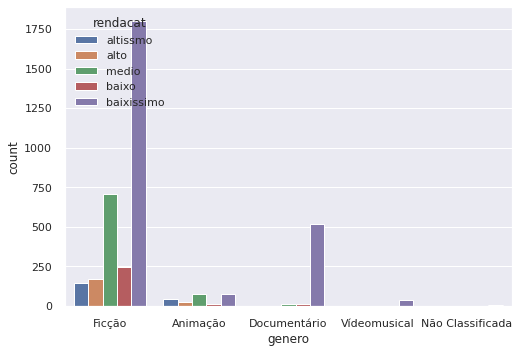

In [ ]:
sns.countplot(x = 'genero', hue = 'rendacat', data = df)
plt.show()

In [ ]:
df.groupby('rendacat')['genero'].value_counts()

rendacat    genero          
altissmo    Ficção               145
            Animação              44
alto        Ficção               170
            Animação              27
            Documentário           1
baixissimo  Ficção              1800
            Documentário         514
            Animação              72
            Vídeomusical          37
            Não Classificada       2
baixo       Ficção               244
            Animação              14
            Documentário          12
            Vídeomusical           1
medio       Ficção               704
            Animação              72
            Documentário          11
Name: genero, dtype: int64

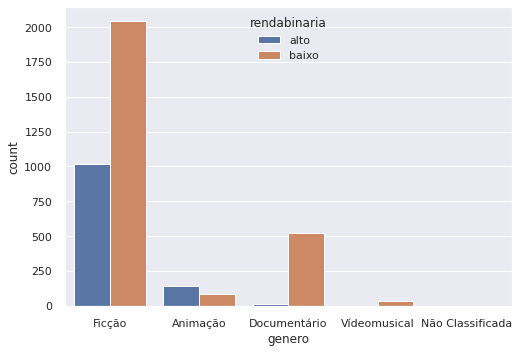

In [ ]:
sns.countplot(x = 'genero', hue = 'rendabinaria', data = df)
plt.show()

In [ ]:
df.groupby('rendabinaria')['genero'].value_counts()

rendabinaria  genero          
alto          Ficção              1019
              Animação             143
              Documentário          12
baixo         Ficção              2044
              Documentário         526
              Animação              86
              Vídeomusical          38
              Não Classificada       2
Name: genero, dtype: int64

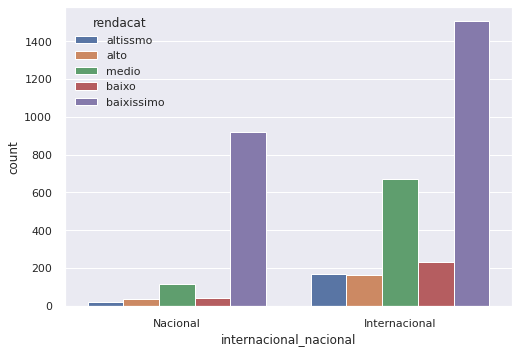

In [ ]:
sns.countplot(x = 'internacional_nacional', hue = 'rendacat', data = df)
plt.show()

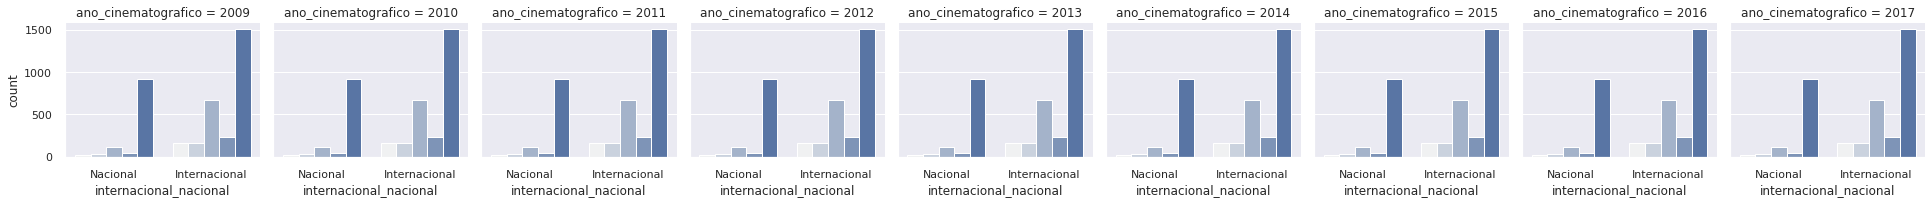

In [ ]:
g = sns.FacetGrid(df, col="ano_cinematografico")
g.map(sns.countplot, x = 'internacional_nacional', hue = 'rendacat', data = df) #tirar dúvida no discord depois sobre isso DD:
# usar groupby???

In [ ]:
df.groupby('rendacat')['internacional_nacional'].value_counts()

rendacat    internacional_nacional
altissmo    Internacional              167
            Nacional                    22
alto        Internacional              164
            Nacional                    34
baixissimo  Internacional             1507
            Nacional                   918
baixo       Internacional              231
            Nacional                    40
medio       Internacional              669
            Nacional                   118
Name: internacional_nacional, dtype: int64

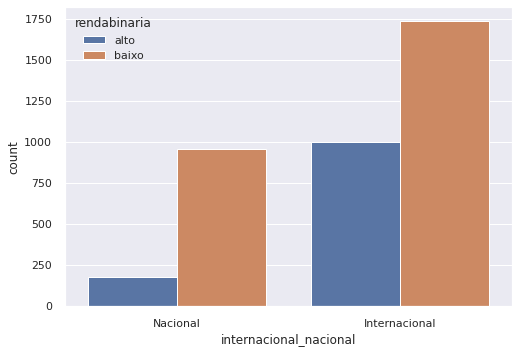

In [ ]:
sns.countplot(x = 'internacional_nacional', hue = 'rendabinaria', data = df)
plt.show()

In [ ]:
df.groupby('rendabinaria')['internacional_nacional'].value_counts()

rendabinaria  internacional_nacional
alto          Internacional             1000
              Nacional                   174
baixo         Internacional             1738
              Nacional                   958
Name: internacional_nacional, dtype: int64

#### Outros insights

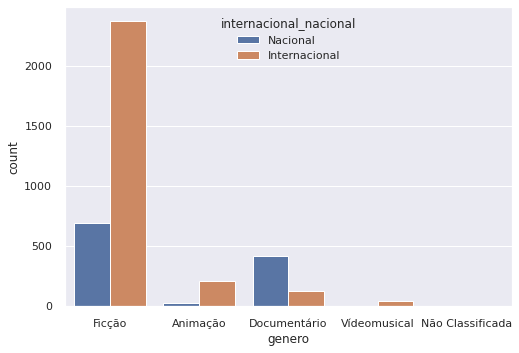

In [ ]:
sns.countplot(x = 'genero', hue = 'internacional_nacional', data = df)
plt.show()

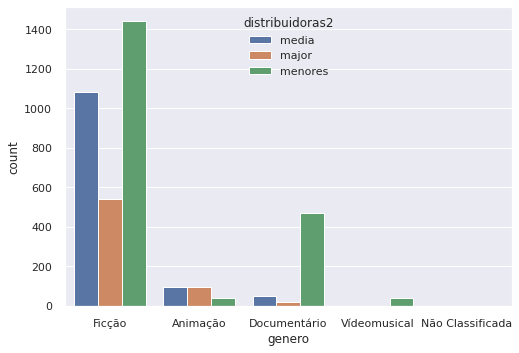

In [ ]:
sns.countplot(x = 'genero', hue = 'distribuidoras2', data = df)
plt.show()

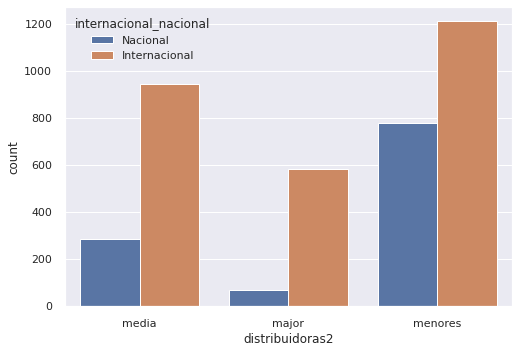

In [ ]:
sns.countplot(x = 'distribuidoras2', hue = 'internacional_nacional', data = df)
plt.show()

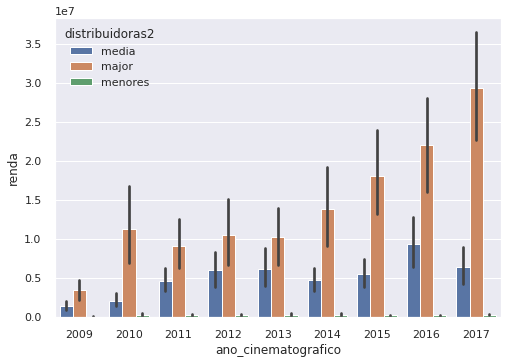

In [ ]:
sns.barplot(x = 'ano_cinematografico', y = 'renda', hue = 'distribuidoras2', data = df)
plt.show()

In [ ]:
print(df[['ano_cinematografico', 'distribuidoras2', 'renda']].groupby(['ano_cinematografico', 'distribuidoras2']).mean())

                                                 renda
ano_cinematografico distribuidoras2                   
2009                major            3411808.301369863
                    media            1424892.762014388
                    menores            38350.032951807
2010                major           11240232.114754098
                    media            2065904.103410853
                    menores           234509.314434783
2011                major            9143456.265569620
                    media            4634300.834338236
                    menores           197373.685072464
2012                major           10478125.785217391
                    media            6000929.559805825
                    menores           246128.058827586
2013                major           10187444.684509804
                    media            6148925.667777778
                    menores           291266.523287671
2014                major           13877699.068333333
          

In [ ]:
df.groupby('ano_cinematografico')['renda'].mean().sort_values(ascending=False)


ano_cinematografico
2017   5787881.697997159
2016   5652003.160427046
2015   4469782.603909091
2012   4343138.777192430
2013   4081238.517324841
2011   3908882.512719547
2014   3854735.216821705
2010   3210243.801639344
2009   1199704.247063492
Name: renda, dtype: float64

In [ ]:
df.groupby('ano_cinematografico')['renda'].max().sort_values(ascending=False)

ano_cinematografico
2015   146184931.000000000
2017   143337776.000000000
2016   142466037.020000011
2012   129595590.000000000
2011   103461153.739999995
2010   102346712.000000000
2013   100816443.890000001
2014    96493278.000000000
2009    28006514.750000000
Name: renda, dtype: float64

In [ ]:
print('2009 - Columbia Tristar', df.loc[df['renda'] == 28006514.750000000, 'titulo_original'])
print('2010 - Fox Filmes', df.loc[df['renda'] == 102346712.000000000, 'titulo_original'])
print('2011 - Zazen Prodções', df.loc[df['renda'] == 103461153.739999995, 'titulo_original'])
print('2012 - Walt Disney', df.loc[df['renda'] == 129595590.000000000, 'titulo_original'])
print('2013 - Paris Filmes', df.loc[df['renda'] == 100816443.890000001, 'titulo_original'])
print('2014 - Walt Disney', df.loc[df['renda'] == 96493278.000000000, 'titulo_original'])
print('2015 - Walt Disney', df.loc[df['renda'] == 146184931.000000000, 'titulo_original'])
print('2016 - Columbia Tristar', df.loc[df['renda'] == 142466037.020000011, 'titulo_original'])
print('2017 - Walt Disney', df.loc[df['renda'] == 143337776.000000000, 'titulo_original'])

2009 - Columbia Tristar 117    ANGELS & DEMONS
Name: titulo_original, dtype: object
2010 - Fox Filmes 9    AVATAR
Name: titulo_original, dtype: object
2011 - Zazen Prodções 1    TROPA DE ELITE 2
Name: titulo_original, dtype: object
2012 - Walt Disney 2    THE AVENGERS
Name: titulo_original, dtype: object
2013 - Paris Filmes 6    THE TWILIGHT SAGA: BREAKING DAWN PART 2
Name: titulo_original, dtype: object
2014 - Walt Disney 19    IRON MAN 3
Name: titulo_original, dtype: object
2015 - Walt Disney 3    THE AVENGERS: AGE OF ULTRON
Name: titulo_original, dtype: object
2016 - Columbia Tristar 4    FURIOUS SEVEN
Name: titulo_original, dtype: object
2017 - Walt Disney 5    CAPTAIN AMERICA: CIVIL WAR
Name: titulo_original, dtype: object


In [ ]:
nacional = df[(df['internacional_nacional'] == 'Nacional') & (df['renda'] > 100000)]
nacional.head(5)

,titulo_original,publico,renda,salas,copias,ano_cinematografico,razao_social_distribuidora,internacional_nacional,genero,tempo_exibicao2,distribuidoras2,rendacat,rendabinaria
0,OS DEZ MANDAMENTOS,11305479,116833026.879999995,7319,263,2016,SM DISTRIBUIDORA DE FILMES LTDA,Nacional,Ficção,222,media,altissmo,alto
1,TROPA DE ELITE 2,11146723,103461153.739999995,6240,5674,2011,ZAZEN PRODUÇÕES AUDIOVISUAIS LTDA.,Nacional,Ficção,168,major,altissmo,alto
8,MINHA MÃE É UMA PEÇA 2,9234363,124681177.819999993,6462,6462,2017,FREESPIRIT DISTRIBUIDORA DE FILMES LTDA.,Nacional,Ficção,108,media,altissmo,alto
35,SE EU FOSSE VOCÊ 2,5787244,47624137.000000000,4162,4061,2010,FOX FILM DO BRASIL LTDA,Nacional,Ficção,264,major,altissmo,alto
51,DE PERNAS PRO AR 2,4846273,50312134.359999999,4050,3475,2013,FREESPIRIT DISTRIBUIDORA DE FILMES LTDA.,Nacional,Ficção,90,media,altissmo,alto


In [ ]:
nacional[(nacional['razao_social_distribuidora'] == 'THE WALT DISNEY COMPANY (BRASIL) LTDA.')]

,titulo_original,publico,renda,salas,copias,ano_cinematografico,razao_social_distribuidora,internacional_nacional,genero,tempo_exibicao2,distribuidoras2,rendacat,rendabinaria
228,S.O.S. MULHERES AO MAR,1776579,20732500.000000000,2026,2026,2014,THE WALT DISNEY COMPANY (BRASIL) LTDA.,Nacional,Ficção,156,major,alto,alto
319,QUALQUER GATO VIRA-LATA,1194628,10742238.990000000,1184,1160,2011,THE WALT DISNEY COMPANY (BRASIL) LTDA.,Nacional,Ficção,114,major,alto,alto
586,ODEIO O DIA DOS NAMORADOS,457523,4492895.000000000,793,793,2013,THE WALT DISNEY COMPANY (BRASIL) LTDA.,Nacional,Ficção,54,major,medio,alto
674,SE PUDER...DIRIJA!,360808,4454754.000000000,1129,1129,2013,THE WALT DISNEY COMPANY (BRASIL) LTDA.,Nacional,Ficção,66,major,medio,alto
952,DESCULPE O TRANSTORNO,153234,1935131.000000000,677,677,2016,THE WALT DISNEY COMPANY (BRASIL) LTDA.,Nacional,Ficção,48,major,medio,alto


In [ ]:
nacional['razao_social_distribuidora'].nunique()

61

In [ ]:
nacional.groupby('razao_social_distribuidora')['renda'].mean().sort_values(ascending=False)

razao_social_distribuidora
ZAZEN PRODUÇÕES AUDIOVISUAIS LTDA.                                  53712368.034999996
FREESPIRIT DISTRIBUIDORA DE FILMES LTDA.                            12672029.814000001
SM DISTRIBUIDORA DE FILMES LTDA                                     12483511.805609755
FOX FILM DO BRASIL LTDA                                              8643839.830624999
THE WALT DISNEY COMPANY (BRASIL) LTDA.                               8471503.798000000
WARNER BROS. (SOUTH) INC.                                            5510867.415714285
WMIX DISTRIBUIDORA LTDA.                                             5453624.260000000
H2O DISTRIBUIDORA DE FILMES LTDA                                     5311992.770000000
COLUMBIA TRISTAR FILMES DO BRASIL LTDA                               4234083.096842106
DIAMOND FILMS DO BRASIL PRODUÇÃO E DISTRIBUIÇÃO AUDIOVISUAL LTDA.    2801967.640000000
CANNES PRODUÇÕES S/A                                                 2773180.639545455
PARAMOUNT PICTUR

In [ ]:
print(nacional[['ano_cinematografico', 'razao_social_distribuidora', 'renda']].groupby(['ano_cinematografico', 'razao_social_distribuidora']).mean())

                                                                                     renda
ano_cinematografico razao_social_distribuidora                                            
2009                CANAL BRAZIL S/A                                      141466.680000000
                    CANNES PRODUÇÕES S/A                                  740059.020000000
                    ESTAÇÃO CINEMA E CULTURA LTDA                         210162.695000000
                    G7 CINEMA LTDA.                                       469204.820000000
                    PARAMOUNT PICTURES BRASIL DISTRIBUIDORA DE FILM...    425340.750000000
                    RAIN NETWORK REPRESENTAÇÃO COMERCIAL LTDA             144600.420000000
                    SERENDIP FILMES LTDA                                  180751.020000000
                    VIDEOFILMES PRODUÇÕES ARTÍSTICA LTDA                  230958.260000000
                    WMIX DISTRIBUIDORA LTDA.                             9920461.084999999



---


# Featuring engineering: preparo do banco para o modelo de regressão logística


---

* Tratamento do target
* Tratamento das variáveis categóricas (get_dummies)
* Exclusão de colunas identificatórias e de colunas que possuem alta correlação entre si (correlação alta apenas com o target não é problema); exclusão de colunas dummy
* Matriz de correlação com as dummies

In [ ]:
df2 = df.copy(deep = True)

In [ ]:
df2['rendabinaria'] = df2['rendabinaria'].map( {'alto': 1, 'baixo': 0})

In [ ]:
df2['rendabinaria'].value_counts

<bound method IndexOpsMixin.value_counts of 0       1
1       1
2       1
3       1
4       1
       ..
3865    0
3866    0
3867    0
3868    0
3869    0
Name: rendabinaria, Length: 3870, dtype: int64>

In [ ]:
df2 = pd.get_dummies(df2, columns=['internacional_nacional', 'genero', 'distribuidoras2'])

In [ ]:
df2.columns.values


array(['titulo_original', 'publico', 'renda', 'salas', 'copias',
       'ano_cinematografico', 'razao_social_distribuidora',
       'tempo_exibicao2', 'rendacat', 'rendabinaria',
       'internacional_nacional_Internacional',
       'internacional_nacional_Nacional', 'genero_Animação',
       'genero_Documentário', 'genero_Ficção', 'genero_Não Classificada',
       'genero_Vídeomusical', 'distribuidoras2_major',
       'distribuidoras2_media', 'distribuidoras2_menores'], dtype=object)

In [ ]:
df2.drop(columns=['copias', 'salas', 'ano_cinematografico', 'razao_social_distribuidora', 'titulo_original', 'internacional_nacional_Internacional', 'genero_Documentário', 'genero_Não Classificada', 'genero_Vídeomusical', 'rendacat', 'renda'], inplace=True)
df2.head(2)

,publico,tempo_exibicao2,rendabinaria,internacional_nacional_Nacional,genero_Animação,genero_Ficção,distribuidoras2_major,distribuidoras2_media,distribuidoras2_menores
0,11305479,222,1,1,0,1,0,1,0
1,11146723,168,1,1,0,1,1,0,0


#### Matriz de correlação com as dummies categóricas (renda binária)

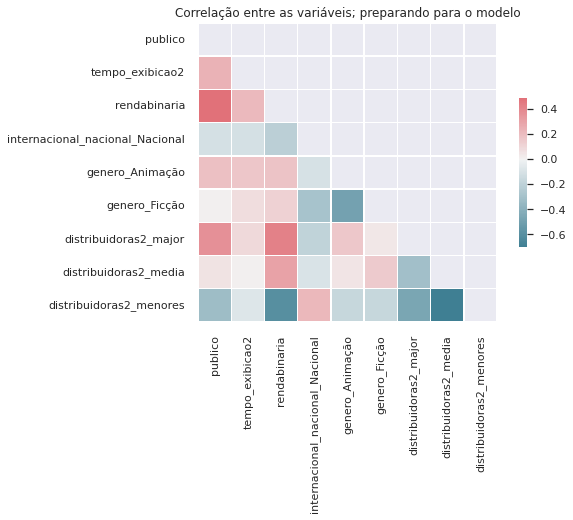

In [ ]:
# Um heatmap, agora com as dummies categoricas
# Generate a mask for the upper triangle
mask = np.zeros_like(df2.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df2.corr(), mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}).set_title("Correlação entre as variáveis; preparando para o modelo");

# Modelos

- Construção sem as versões de treino e teste;
- Construção com a versão de treino e teste e avaliação pela matriz de confusão



---


# Parte 1 - "Tradicional"


---



## Modelo 1

- Regressão logística "tradicional"
- Todas as variáveis de uma vez

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
m1 = smf.logit("rendabinaria ~ publico + tempo_exibicao2 + C(internacional_nacional_Nacional) + C(genero_Animação) + C(genero_Ficção) + C(distribuidoras2_major) + C(distribuidoras2_media) + C(distribuidoras2_menores)", 
               data = df2).fit()

m1.summary()

Optimization terminated successfully.
         Current function value: 0.035757
         Iterations 15


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           rendabinaria   No. Observations:                 3870
Model:                          Logit   Df Residuals:                     3861
Method:                           MLE   Df Model:                            8
Date:                Fri, 30 Sep 2022   Pseudo R-squ.:                  0.9417
Time:                        18:11:23   Log-Likelihood:                -138.38
converged:                       True   LL-Null:                       -2375.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                  -6.7836   1.22e+07  -5.56e-07      1.000   -2.39e+07    2.39e+07
C(internacional_nacional_Nacional)[T.1]    -0.7874      0.436     -1.807      0.071      -1.641       0.067
C(genero_Animação)[T.1]                    -0.6419      1.164     -0.552      0.581      -2.923       1.639
C(genero_Ficção)[T.1]                       0.6926      0.931      0.744      0.457      -1.132       2.517
C(distribuidoras2_major)[T.1]              -2.6160   1.22e+07  -2.14e-07      1.000   -2.39e+07    2.39e+07
C(distribuidoras2_media)[T.1]              -2.3610   1.22e+07  -1.93e-07      1.000   -2.39e+07    2.39e+07
C(distribuidoras2_menores)[T.1]            -1.8066   1.22e+07  -1.48e-07      1.000   -2.39e+07    2.39e+07
publico                                     0.0001   9.34e-06     12.610      0.000    9.95e-05       0.000
tempo_exibicao2                            -0.0171      0.003     -5.205      0.000      -0.024      -0.011
===========================================================================================================

Possibly complete quasi-separation: A fraction 0.46 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [ ]:
m1_odds = pd.DataFrame(np.exp(m1.params), columns= ['OR'])
m1_odds['z-value']= m1.pvalues
m1_odds[['2.5%', '97.5%']] = np.exp(m1.conf_int())

m1_odds

,OR,z-value,2.5%,97.5%
Intercept,0.001132147,0.999999557,0.000000000,inf
C(internacional_nacional_Nacional)[T.1],0.455004324,0.070724785,0.193700685,1.068808480
C(genero_Animação)[T.1],0.526315364,0.581230579,0.053795585,5.149267588
C(genero_Ficção)[T.1],1.998888607,0.456867973,0.322417098,12.392505515
C(distribuidoras2_major)[T.1],0.073096612,0.999999829,0.000000000,inf
C(distribuidoras2_media)[T.1],0.094322635,0.999999846,0.000000000,inf
C(distribuidoras2_menores)[T.1],0.164206518,0.999999882,0.000000000,inf
publico,1.000117810,0.000000000,1.000099499,1.000136123
tempo_exibicao2,0.983061845,0.000000194,0.976757836,0.989406540


- O valor do intercepto não foi estatisticamente significativo; portanto não podemos interpretar nada por enquanto (nesse caso, o modelo não foi adequado)

## Modelo 2

- Estratégia de acrescentar variáveis aos poucos

In [ ]:
m2 = smf.logit("rendabinaria ~ publico", data = df2).fit()

m2.summary()

Optimization terminated successfully.
         Current function value: 0.041380
         Iterations 14


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           rendabinaria   No. Observations:                 3870
Model:                          Logit   Df Residuals:                     3868
Method:                           MLE   Df Model:                            1
Date:                Fri, 30 Sep 2022   Pseudo R-squ.:                  0.9326
Time:                        18:11:23   Log-Likelihood:                -160.14
converged:                       True   LL-Null:                       -2375.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.9195      0.621    -14.365      0.000     -10.136      -7.703
publico        0.0001   7.38e-06     13.985      0.000    8.87e-05       0.000
==============================================================================

Possibly complete quasi-separation: A fraction 0.23 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [ ]:
m2_odds = pd.DataFrame(np.exp(m2.params), columns= ['OR'])
m2_odds['z-value']= m2.pvalues
m2_odds[['2.5%', '97.5%']] = np.exp(m2.conf_int())

m2_odds

,OR,z-value,2.5%,97.5%
Intercept,0.000133756,0.000000000,0.000039608,0.000451693
publico,1.000103189,0.000000000,1.000088727,1.000117651


## Modelo 3

In [ ]:
m3 = smf.logit("rendabinaria ~ tempo_exibicao2", data = df2).fit()

m3.summary()

Optimization terminated successfully.
         Current function value: 0.590567
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           rendabinaria   No. Observations:                 3870
Model:                          Logit   Df Residuals:                     3868
Method:                           MLE   Df Model:                            1
Date:                Fri, 30 Sep 2022   Pseudo R-squ.:                 0.03767
Time:                        18:11:24   Log-Likelihood:                -2285.5
converged:                       True   LL-Null:                       -2375.0
Covariance Type:            nonrobust   LLR p-value:                 8.334e-41
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -1.4982      0.064    -23.246      0.000      -1.625      -1.372
tempo_exibicao2     0.0080      0.001     12.832      0.000       0.007       0.009
===================================================================================
"""

In [ ]:
m3_odds = pd.DataFrame(np.exp(m3.params), columns= ['OR'])
m3_odds['z-value']= m3.pvalues
m3_odds[['2.5%', '97.5%']] = np.exp(m3.conf_int())

m3_odds

,OR,z-value,2.5%,97.5%
Intercept,0.223526681,0.000000000,0.197000786,0.253624251
tempo_exibicao2,1.008054814,0.000000000,1.006820289,1.009290853


- O m3 também tinha público, mas o aviso acima "Possibly complete quasi-separation: A fraction 0.23 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified." quer dizer que algumas das caselas da relação do target com as features têm muitos poucos casos ("In other words, at least one group of
the dependent variable has zero frequency for at least one category of an independent variable" [fonte](https://support.sas.com/resources/papers/proceedings16/10220-2016.pdf)). Vemos com a análise exploratória que o público dos filmes de baixo rendimento é muito, muito baixo. Por isso o melhor é deixar essa variável de lado por enquanto, ou pensar em alguma outra solução.

## Modelo 4

In [ ]:
m4 = smf.logit("rendabinaria ~ tempo_exibicao2 + C(internacional_nacional_Nacional)", data = df2).fit()

m4.summary()

Optimization terminated successfully.
         Current function value: 0.570696
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           rendabinaria   No. Observations:                 3870
Model:                          Logit   Df Residuals:                     3867
Method:                           MLE   Df Model:                            2
Date:                Fri, 30 Sep 2022   Pseudo R-squ.:                 0.07005
Time:                        18:11:24   Log-Likelihood:                -2208.6
converged:                       True   LL-Null:                       -2375.0
Covariance Type:            nonrobust   LLR p-value:                 5.616e-73
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                  -1.1946      0.069    -17.429      0.000      -1.329      -1.060
C(internacional_nacional_Nacional)[T.1]    -1.0822      0.093    -11.627      0.000      -1.265      -0.900
tempo_exibicao2                             0.0075      0.001     11.754      0.000       0.006       0.009
===========================================================================================================
"""

In [ ]:
m4_odds = pd.DataFrame(np.exp(m4.params), columns= ['OR'])
m4_odds['z-value']= m4.pvalues
m4_odds[['2.5%', '97.5%']] = np.exp(m4.conf_int())

m4_odds

,OR,z-value,2.5%,97.5%
Intercept,0.302835298,0.000000000,0.264767815,0.346376004
C(internacional_nacional_Nacional)[T.1],0.338839334,0.000000000,0.282337163,0.406648892
tempo_exibicao2,1.007515526,0.000000000,1.006258451,1.008774172


## Modelo 5

In [ ]:
m5 = smf.logit("rendabinaria ~ tempo_exibicao2 + C(internacional_nacional_Nacional) + C(genero_Animação)", data = df2).fit()

m5.summary()

Optimization terminated successfully.
         Current function value: 0.563870
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           rendabinaria   No. Observations:                 3870
Model:                          Logit   Df Residuals:                     3866
Method:                           MLE   Df Model:                            3
Date:                Fri, 30 Sep 2022   Pseudo R-squ.:                 0.08117
Time:                        18:11:24   Log-Likelihood:                -2182.2
converged:                       True   LL-Null:                       -2375.0
Covariance Type:            nonrobust   LLR p-value:                 2.973e-83
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                  -1.2217      0.069    -17.636      0.000      -1.357      -1.086
C(internacional_nacional_Nacional)[T.1]    -1.0325      0.094    -11.029      0.000      -1.216      -0.849
C(genero_Animação)[T.1]                     1.0622      0.148      7.169      0.000       0.772       1.353
tempo_exibicao2                             0.0068      0.001     10.538      0.000       0.006       0.008
===========================================================================================================
"""

In [ ]:
m5_odds = pd.DataFrame(np.exp(m5.params), columns= ['OR'])
m5_odds['z-value']= m5.pvalues
m5_odds[['2.5%', '97.5%']] = np.exp(m5.conf_int())

m5_odds

,OR,z-value,2.5%,97.5%
Intercept,0.294741086,0.000000000,0.257322984,0.337600266
C(internacional_nacional_Nacional)[T.1],0.356106920,0.000000000,0.296411699,0.427824336
C(genero_Animação)[T.1],2.892811244,0.000000000,2.163698634,3.867616663
tempo_exibicao2,1.006859435,0.000000000,1.005580126,1.008140371


## Modelo 6

In [ ]:
m6 = smf.logit("rendabinaria ~ tempo_exibicao2 + C(internacional_nacional_Nacional) + C(genero_Animação) + C(genero_Ficção)", data = df2).fit()

m6.summary()

Optimization terminated successfully.
         Current function value: 0.539868
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           rendabinaria   No. Observations:                 3870
Model:                          Logit   Df Residuals:                     3865
Method:                           MLE   Df Model:                            4
Date:                Fri, 30 Sep 2022   Pseudo R-squ.:                  0.1203
Time:                        18:11:24   Log-Likelihood:                -2089.3
converged:                       True   LL-Null:                       -2375.0
Covariance Type:            nonrobust   LLR p-value:                2.473e-122
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                  -3.7766      0.301    -12.526      0.000      -4.368      -3.186
C(internacional_nacional_Nacional)[T.1]    -0.6641      0.098     -6.786      0.000      -0.856      -0.472
C(genero_Animação)[T.1]                     3.6790      0.329     11.188      0.000       3.034       4.323
C(genero_Ficção)[T.1]                       2.7191      0.298      9.125      0.000       2.135       3.303
tempo_exibicao2                             0.0059      0.001      8.966      0.000       0.005       0.007
===========================================================================================================
"""

In [ ]:
m6_odds = pd.DataFrame(np.exp(m6.params), columns= ['OR'])
m6_odds['z-value']= m6.pvalues
m6_odds[['2.5%', '97.5%']] = np.exp(m6.conf_int())

m6_odds

,OR,z-value,2.5%,97.5%
Intercept,0.022900185,0.000000000,0.012682489,0.041349807
C(internacional_nacional_Nacional)[T.1],0.514720206,0.000000000,0.424877864,0.623560116
C(genero_Animação)[T.1],39.605910271,0.000000000,20.790230375,75.450252360
C(genero_Ficção)[T.1],15.166248245,0.000000000,8.457370714,27.196996987
tempo_exibicao2,1.005940063,0.000000000,1.004638600,1.007243212


## Modelo 7

- Vou testar a interação entre os gêneros ficcção e animação

In [ ]:
#m7 = smf.logit("rendabinaria ~ tempo_exibicao2 + C(internacional_nacional_Nacional) + C(genero_Animação) + C(genero_Ficção) + C(genero_Animação):C(genero_Ficção)", data = df2).fit()

#m7.summary() # ver como testar interação depois

In [ ]:
#m7_odds = pd.DataFrame(np.exp(m7.params), columns= ['OR'])
#m7_odds['z-value']= m7.pvalues
#m7_odds[['2.5%', '97.5%']] = np.exp(m7.conf_int())

#m7_odds

Ver esse link: https://splunktool.com/how-to-include-interaction-variables-in-logit-statsmodel-python

## Modelo 8

In [ ]:
m8 = smf.logit("rendabinaria ~ tempo_exibicao2 + C(internacional_nacional_Nacional) + C(genero_Animação) + C(genero_Ficção) + C(distribuidoras2_major)", data = df2).fit()

m8.summary()

Optimization terminated successfully.
         Current function value: 0.477534
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           rendabinaria   No. Observations:                 3870
Model:                          Logit   Df Residuals:                     3864
Method:                           MLE   Df Model:                            5
Date:                Fri, 30 Sep 2022   Pseudo R-squ.:                  0.2219
Time:                        18:11:24   Log-Likelihood:                -1848.1
converged:                       True   LL-Null:                       -2375.0
Covariance Type:            nonrobust   LLR p-value:                1.354e-225
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                  -4.1437      0.307    -13.486      0.000      -4.746      -3.541
C(internacional_nacional_Nacional)[T.1]    -0.4208      0.104     -4.035      0.000      -0.625      -0.216
C(genero_Animação)[T.1]                     3.3268      0.339      9.802      0.000       2.662       3.992
C(genero_Ficção)[T.1]                       2.5838      0.302      8.557      0.000       1.992       3.176
C(distribuidoras2_major)[T.1]               2.1389      0.105     20.408      0.000       1.933       2.344
tempo_exibicao2                             0.0063      0.001      8.902      0.000       0.005       0.008
===========================================================================================================
"""

In [ ]:
m8_odds = pd.DataFrame(np.exp(m8.params), columns= ['OR'])
m8_odds['z-value']= m8.pvalues
m8_odds[['2.5%', '97.5%']] = np.exp(m8.conf_int())

m8_odds

,OR,z-value,2.5%,97.5%
Intercept,0.015864578,0.000000000,0.008687542,0.028970776
C(internacional_nacional_Nacional)[T.1],0.656507602,0.000054623,0.535135381,0.805407841
C(genero_Animação)[T.1],27.847700242,0.000000000,14.318735009,54.159421785
C(genero_Ficção)[T.1],13.247190143,0.000000000,7.329827519,23.941633855
C(distribuidoras2_major)[T.1],8.489837498,0.000000000,6.913320742,10.425863842
tempo_exibicao2,1.006275359,0.000000000,1.004890339,1.007662288


## Modelo 9

In [ ]:
m9 = smf.logit("rendabinaria ~ tempo_exibicao2 + C(internacional_nacional_Nacional) + C(genero_Animação) + C(genero_Ficção) + C(distribuidoras2_major) + C(distribuidoras2_media)", data = df2).fit()

m9.summary()

Optimization terminated successfully.
         Current function value: 0.358323
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           rendabinaria   No. Observations:                 3870
Model:                          Logit   Df Residuals:                     3863
Method:                           MLE   Df Model:                            6
Date:                Fri, 30 Sep 2022   Pseudo R-squ.:                  0.4161
Time:                        18:11:24   Log-Likelihood:                -1386.7
converged:                       True   LL-Null:                       -2375.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                  -6.1040      0.365    -16.726      0.000      -6.819      -5.389
C(internacional_nacional_Nacional)[T.1]    -0.4542      0.123     -3.703      0.000      -0.695      -0.214
C(genero_Animação)[T.1]                     2.1303      0.370      5.754      0.000       1.405       2.856
C(genero_Ficção)[T.1]                       1.9619      0.327      5.997      0.000       1.321       2.603
C(distribuidoras2_major)[T.1]               4.3972      0.167     26.267      0.000       4.069       4.725
C(distribuidoras2_media)[T.1]               3.4596      0.150     22.998      0.000       3.165       3.754
tempo_exibicao2                             0.0109      0.001     11.957      0.000       0.009       0.013
===========================================================================================================
"""

In [ ]:
m9_odds = pd.DataFrame(np.exp(m9.params), columns= ['OR'])
m9_odds['z-value']= m9.pvalues
m9_odds[['2.5%', '97.5%']] = np.exp(m9.conf_int())

m9_odds

,OR,z-value,2.5%,97.5%
Intercept,0.002233977,0.000000000,0.001092549,0.004567897
C(internacional_nacional_Nacional)[T.1],0.634944588,0.000213385,0.499246427,0.807526320
C(genero_Animação)[T.1],8.417801743,0.000000009,4.074284214,17.391861357
C(genero_Ficção)[T.1],7.113056355,0.000000002,3.746329934,13.505369684
C(distribuidoras2_major)[T.1],81.226051047,0.000000000,58.505760630,112.769602474
C(distribuidoras2_media)[T.1],31.803178545,0.000000000,23.682504487,42.708412285
tempo_exibicao2,1.010982931,0.000000000,1.009174458,1.012794644


## Modelo 10

In [ ]:
m10 = smf.logit("rendabinaria ~ tempo_exibicao2 + C(internacional_nacional_Nacional) + C(genero_Animação) + C(genero_Ficção) + C(distribuidoras2_major) + C(distribuidoras2_media) + C(distribuidoras2_menores)", data = df2).fit()

m10.summary()

         Current function value: 0.358323
         Iterations: 35


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           rendabinaria   No. Observations:                 3870
Model:                          Logit   Df Residuals:                     3862
Method:                           MLE   Df Model:                            7
Date:                Fri, 30 Sep 2022   Pseudo R-squ.:                  0.4161
Time:                        18:11:24   Log-Likelihood:                -1386.7
converged:                      False   LL-Null:                       -2375.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                  -2.6138    6.1e+06  -4.28e-07      1.000    -1.2e+07     1.2e+07
C(internacional_nacional_Nacional)[T.1]    -0.4542      0.123     -3.703      0.000      -0.695      -0.214
C(genero_Animação)[T.1]                     2.1303      0.370      5.754      0.000       1.405       2.856
C(genero_Ficção)[T.1]                       1.9619      0.327      5.997      0.000       1.321       2.603
C(distribuidoras2_major)[T.1]               0.9070    6.1e+06   1.49e-07      1.000    -1.2e+07     1.2e+07
C(distribuidoras2_media)[T.1]              -0.0306    6.1e+06  -5.02e-09      1.000    -1.2e+07     1.2e+07
C(distribuidoras2_menores)[T.1]            -3.4902    6.1e+06  -5.72e-07      1.000    -1.2e+07     1.2e+07
tempo_exibicao2                             0.0109      0.001     11.957      0.000       0.009       0.013
===========================================================================================================
"""

In [ ]:
m10_odds = pd.DataFrame(np.exp(m10.params), columns= ['OR'])
m10_odds['z-value']= m10.pvalues
m10_odds[['2.5%', '97.5%']] = np.exp(m10.conf_int())

m10_odds

,OR,z-value,2.5%,97.5%
Intercept,0.073256882,0.999999658,0.000000000,inf
C(internacional_nacional_Nacional)[T.1],0.634944588,0.000213385,0.499246427,0.807526320
C(genero_Animação)[T.1],8.417801743,0.000000009,4.074284214,17.391861357
C(genero_Ficção)[T.1],7.113056355,0.000000002,3.746329934,13.505369684
C(distribuidoras2_major)[T.1],2.476997891,0.999999881,0.000000000,inf
C(distribuidoras2_media)[T.1],0.969841636,0.999999996,0.000000000,inf
C(distribuidoras2_menores)[T.1],0.030495117,0.999999544,0.000000000,inf
tempo_exibicao2,1.010982931,0.000000000,1.009174458,1.012794644


- Algumas discussões não veem exatamente um problema no limite superior tendendo ao infinito ou no intercepto com valor que não é estatisticamente significativo (p-value)... não saberia o que fazer nesse caso. O ajuste do modelo não parece ter mudado tanto, então talvez seja melhor retirar o distribuidoras menores
- O modelo final por enquanto é o m9 (antes da análise de resíduos)

## Modelo 11

- Esse foi montado após a primeira análise de resíduos

In [ ]:
m11 = smf.logit("rendabinaria ~ C(internacional_nacional_Nacional) + C(genero_Animação) + C(genero_Ficção) + C(distribuidoras2_major) + C(distribuidoras2_media)", data = df2).fit()

m11.summary()

Optimization terminated successfully.
         Current function value: 0.378738
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           rendabinaria   No. Observations:                 3870
Model:                          Logit   Df Residuals:                     3864
Method:                           MLE   Df Model:                            5
Date:                Fri, 30 Sep 2022   Pseudo R-squ.:                  0.3828
Time:                        18:11:25   Log-Likelihood:                -1465.7
converged:                       True   LL-Null:                       -2375.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                  -5.1023      0.333    -15.308      0.000      -5.756      -4.449
C(internacional_nacional_Nacional)[T.1]    -0.3723      0.117     -3.189      0.001      -0.601      -0.144
C(genero_Animação)[T.1]                     2.6252      0.355      7.391      0.000       1.929       3.321
C(genero_Ficção)[T.1]                       2.1021      0.317      6.638      0.000       1.481       2.723
C(distribuidoras2_major)[T.1]               4.1118      0.155     26.491      0.000       3.808       4.416
C(distribuidoras2_media)[T.1]               3.1342      0.137     22.832      0.000       2.865       3.403
===========================================================================================================
"""

In [ ]:
m11_odds = pd.DataFrame(np.exp(m11.params), columns= ['OR'])
m11_odds['z-value']= m11.pvalues
m11_odds[['2.5%', '97.5%']] = np.exp(m11.conf_int())

m11_odds

,OR,z-value,2.5%,97.5%
Intercept,0.006082502,0.000000000,0.003164968,0.011689481
C(internacional_nacional_Nacional)[T.1],0.689145969,0.001425433,0.548215258,0.866305999
C(genero_Animação)[T.1],13.807211815,0.000000000,6.883031422,27.696967574
C(genero_Ficção)[T.1],8.183608944,0.000000000,4.399193421,15.223575992
C(distribuidoras2_major)[T.1],61.056804553,0.000000000,45.041823524,82.766040329
C(distribuidoras2_media)[T.1],22.971295932,0.000000000,17.552483477,30.063007181


# Análise de resíduos dos modelos

## Análise de resíduos (modelo 9)

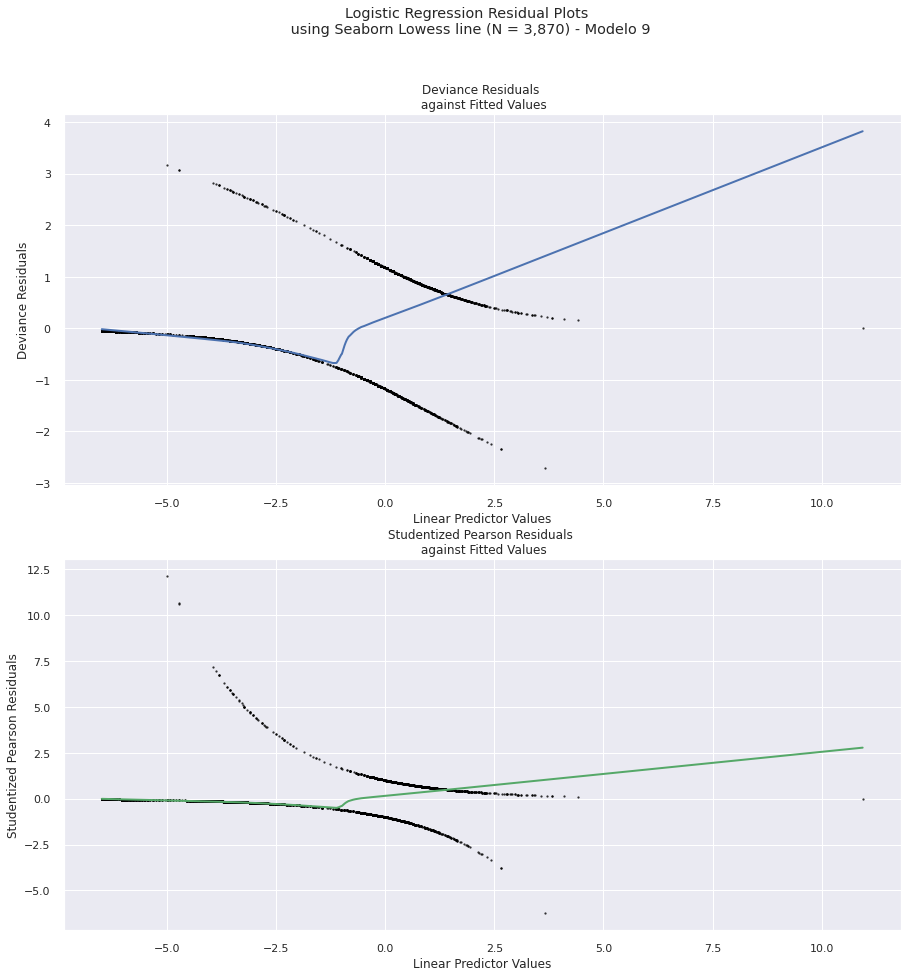

In [ ]:
## Análise de resíduos
fig, (axL, axR) = plt.subplots(2, figsize=(15, 15))
plt.suptitle("Logistic Regression Residual Plots \n using Seaborn Lowess line (N = 3,870) - Modelo 9")


# Deviance Residuals
sns.regplot(m9.fittedvalues, m9.resid_dev, ax= axL,
            color="black", scatter_kws={"s": 5},
            line_kws={"color":"b", "alpha":1, "lw":2}, lowess=True)

axL.set_title("Deviance Residuals \n against Fitted Values")
axL.set_xlabel("Linear Predictor Values")
axL.set_ylabel("Deviance Residuals")

# Studentized Pearson Residuals
sns.regplot(m9.fittedvalues, m9.resid_pearson, ax= axR,
            color="black", scatter_kws={"s": 5},
            line_kws={"color":"g", "alpha":1, "lw":2}, lowess=True)

axR.set_title("Studentized Pearson Residuals \n against Fitted Values")
axR.set_xlabel("Linear Predictor Values")
axR.set_ylabel("Studentized Pearson Residuals")

plt.show()

## Análise de resíduos (modelo 8)

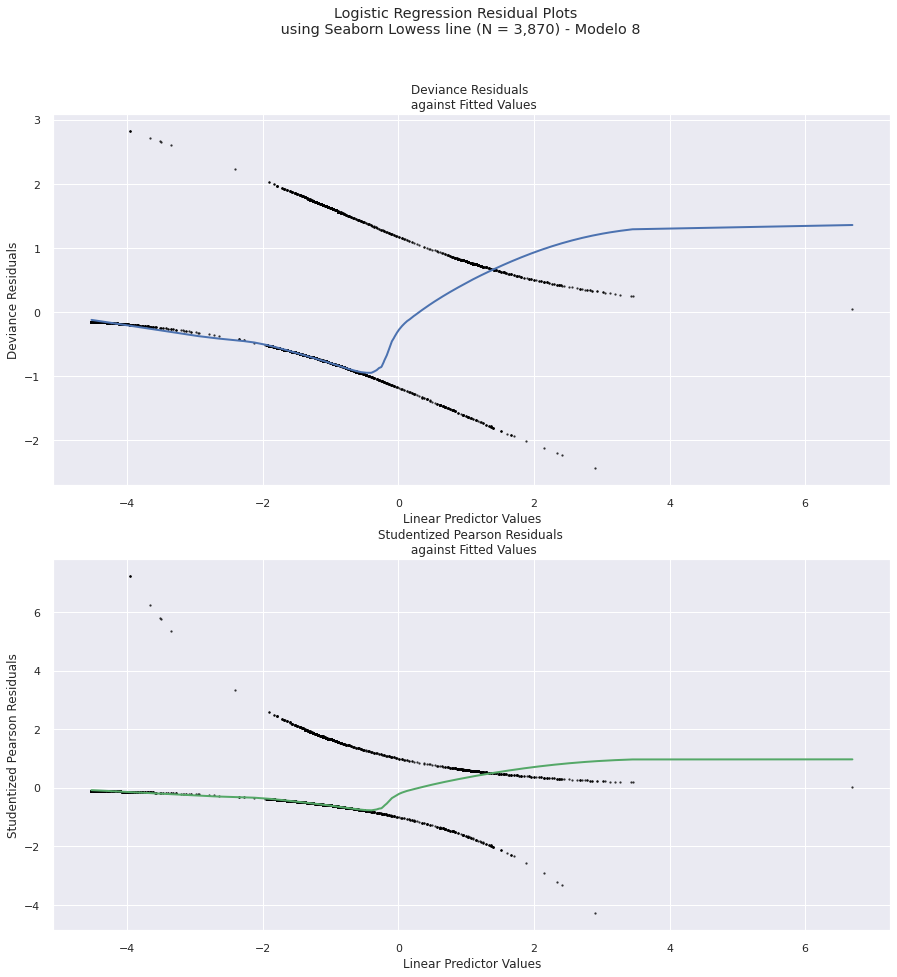

In [ ]:
## Testar com o modelo 8

fig, (axL, axR) = plt.subplots(2, figsize=(15, 15))
plt.suptitle("Logistic Regression Residual Plots \n using Seaborn Lowess line (N = 3,870) - Modelo 8")


# Deviance Residuals
sns.regplot(m8.fittedvalues, m8.resid_dev, ax= axL,
            color="black", scatter_kws={"s": 5},
            line_kws={"color":"b", "alpha":1, "lw":2}, lowess=True)

axL.set_title("Deviance Residuals \n against Fitted Values")
axL.set_xlabel("Linear Predictor Values")
axL.set_ylabel("Deviance Residuals")

# Studentized Pearson Residuals
sns.regplot(m8.fittedvalues, m8.resid_pearson, ax= axR,
            color="black", scatter_kws={"s": 5},
            line_kws={"color":"g", "alpha":1, "lw":2}, lowess=True)

axR.set_title("Studentized Pearson Residuals \n against Fitted Values")
axR.set_xlabel("Linear Predictor Values")
axR.set_ylabel("Studentized Pearson Residuals")

plt.show()

## Análise de resíduos (modelo 11)

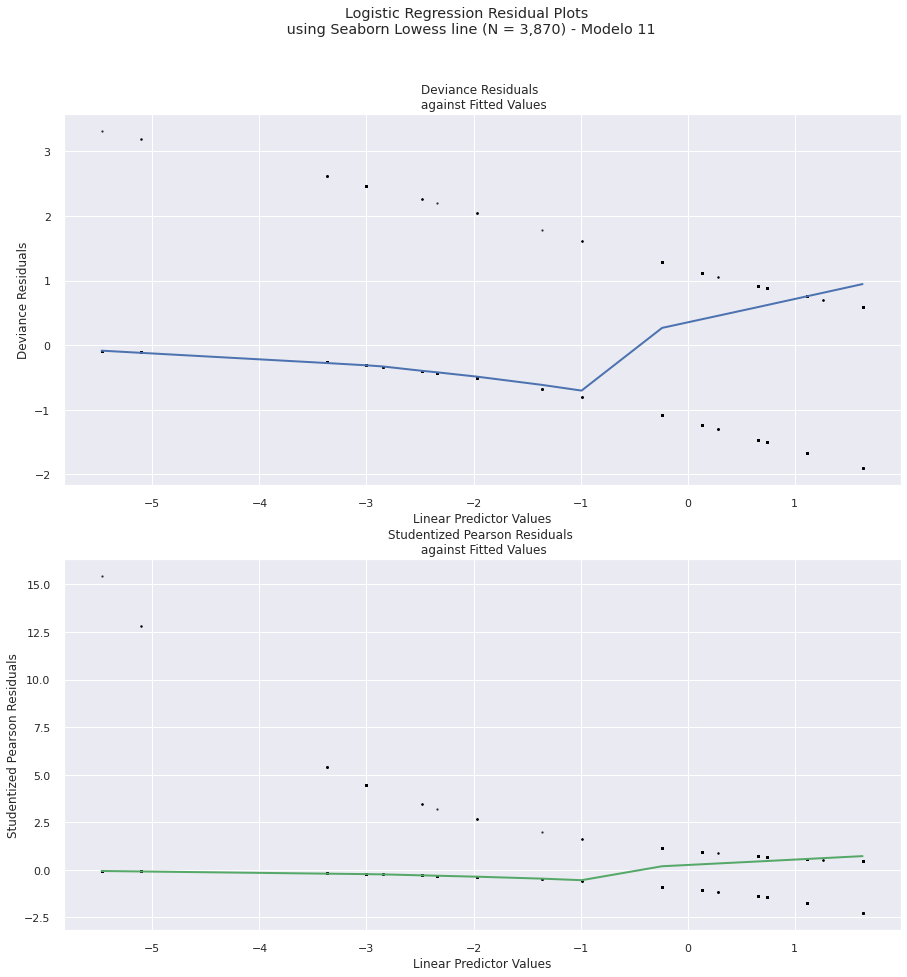

In [ ]:
## Testar com o modelo 11, sem tempo de exibição

fig, (axL, axR) = plt.subplots(2, figsize=(15, 15))
plt.suptitle("Logistic Regression Residual Plots \n using Seaborn Lowess line (N = 3,870) - Modelo 11")


# Deviance Residuals
sns.regplot(m11.fittedvalues, m11.resid_dev, ax= axL,
            color="black", scatter_kws={"s": 5},
            line_kws={"color":"b", "alpha":1, "lw":2}, lowess=True)

axL.set_title("Deviance Residuals \n against Fitted Values")
axL.set_xlabel("Linear Predictor Values")
axL.set_ylabel("Deviance Residuals")

# Studentized Pearson Residuals
sns.regplot(m11.fittedvalues, m11.resid_pearson, ax= axR,
            color="black", scatter_kws={"s": 5},
            line_kws={"color":"g", "alpha":1, "lw":2}, lowess=True)

axR.set_title("Studentized Pearson Residuals \n against Fitted Values")
axR.set_xlabel("Linear Predictor Values")
axR.set_ylabel("Studentized Pearson Residuals")

plt.show()

#### Diagnóstico 

- Um dos problemas que podemos encontrar é a ausência de linearidade na relação com o target, pelo modelo de regressão logística ainda ser semi-paramétrico (ainda há algumas suposições do tipo de distribuição, apesar da função de ligação logarítmica). O modelo 11 parece ser o melhor.

# [Vou fazer mais um mas levando em consideração o número de salas e ver o que acontece]

#### Preparo prévio do banco mais uma vez

In [ ]:
df3 = df.copy(deep = True)

In [ ]:
df3['rendabinaria'] = df3['rendabinaria'].map( {'alto': 1, 'baixo': 0})

In [ ]:
df3['rendabinaria'].value_counts

<bound method IndexOpsMixin.value_counts of 0       1
1       1
2       1
3       1
4       1
       ..
3865    0
3866    0
3867    0
3868    0
3869    0
Name: rendabinaria, Length: 3870, dtype: int64>

In [ ]:
df3 = pd.get_dummies(df3, columns=['internacional_nacional', 'genero', 'distribuidoras2'])

In [ ]:
df3.columns.values


array(['titulo_original', 'publico', 'renda', 'salas', 'copias',
       'ano_cinematografico', 'razao_social_distribuidora',
       'tempo_exibicao2', 'rendacat', 'rendabinaria',
       'internacional_nacional_Internacional',
       'internacional_nacional_Nacional', 'genero_Animação',
       'genero_Documentário', 'genero_Ficção', 'genero_Não Classificada',
       'genero_Vídeomusical', 'distribuidoras2_major',
       'distribuidoras2_media', 'distribuidoras2_menores'], dtype=object)

In [ ]:
df3.drop(columns=['copias', 'publico', 'ano_cinematografico', 'razao_social_distribuidora', 'titulo_original', 'internacional_nacional_Internacional', 'genero_Documentário', 'genero_Não Classificada', 'genero_Vídeomusical', 'rendacat', 'renda'], inplace=True)
df3.head(2)

,salas,tempo_exibicao2,rendabinaria,internacional_nacional_Nacional,genero_Animação,genero_Ficção,distribuidoras2_major,distribuidoras2_media,distribuidoras2_menores
0,7319,222,1,1,0,1,0,1,0
1,6240,168,1,1,0,1,1,0,0


# Modelo 12

In [ ]:
m12 = smf.logit("rendabinaria ~ C(internacional_nacional_Nacional) + C(genero_Animação) + C(genero_Ficção) + C(distribuidoras2_major) + C(distribuidoras2_media) + salas", data = df3).fit()

m12.summary()

Optimization terminated successfully.
         Current function value: 0.086191
         Iterations 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           rendabinaria   No. Observations:                 3870
Model:                          Logit   Df Residuals:                     3863
Method:                           MLE   Df Model:                            6
Date:                Fri, 30 Sep 2022   Pseudo R-squ.:                  0.8596
Time:                        18:11:33   Log-Likelihood:                -333.56
converged:                       True   LL-Null:                       -2375.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                  -6.4224      0.589    -10.906      0.000      -7.577      -5.268
C(internacional_nacional_Nacional)[T.1]    -2.6279      0.394     -6.668      0.000      -3.400      -1.855
C(genero_Animação)[T.1]                    -4.8996      0.823     -5.952      0.000      -6.513      -3.286
C(genero_Ficção)[T.1]                      -0.0626      0.557     -0.112      0.911      -1.154       1.029
C(distribuidoras2_major)[T.1]               0.7861      0.330      2.384      0.017       0.140       1.432
C(distribuidoras2_media)[T.1]               1.0047      0.251      4.005      0.000       0.513       1.496
salas                                       0.0227      0.001     18.224      0.000       0.020       0.025
===========================================================================================================

Possibly complete quasi-separation: A fraction 0.20 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

- Poderia melhorar o modelo, mas tem o mesmo problema de caselas de público

In [ ]:
m12_odds = pd.DataFrame(np.exp(m12.params), columns= ['OR'])
m12_odds['z-value']= m12.pvalues
m12_odds[['2.5%', '97.5%']] = np.exp(m12.conf_int())

m12_odds

,OR,z-value,2.5%,97.5%
Intercept,0.001624789,0.000000000,0.000512315,0.005152961
C(internacional_nacional_Nacional)[T.1],0.072232097,0.000000000,0.033362398,0.156387915
C(genero_Animação)[T.1],0.007449522,0.000000003,0.001484174,0.037391435
C(genero_Ficção)[T.1],0.939357235,0.910590358,0.315226509,2.799231629
C(distribuidoras2_major)[T.1],2.194791344,0.017111382,1.150161247,4.188203221
C(distribuidoras2_media)[T.1],2.731085836,0.000061908,1.670414255,4.465257537
salas,1.022947809,0.000000000,1.020454679,1.025447030


## Análise de resíduos (Modelo 12)

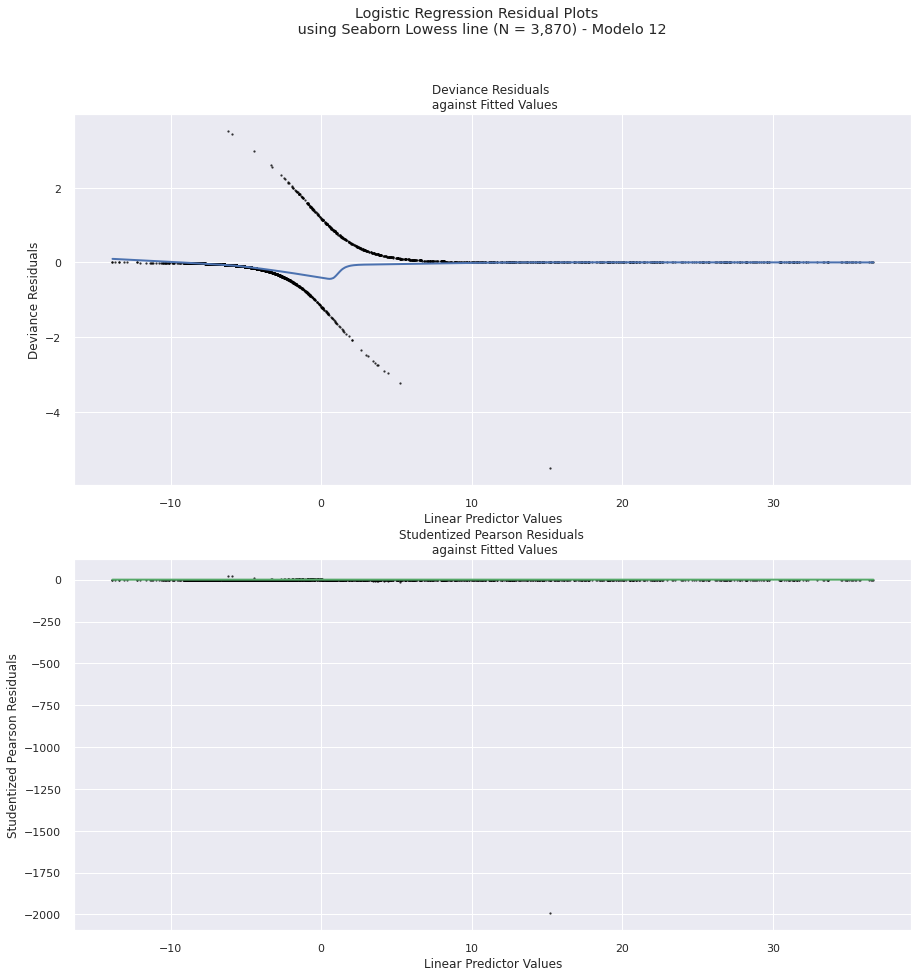

In [ ]:
## Testar com o modelo 12, com número de salas

fig, (axL, axR) = plt.subplots(2, figsize=(15, 15))
plt.suptitle("Logistic Regression Residual Plots \n using Seaborn Lowess line (N = 3,870) - Modelo 12")


# Deviance Residuals
sns.regplot(m12.fittedvalues, m12.resid_dev, ax= axL,
            color="black", scatter_kws={"s": 5},
            line_kws={"color":"b", "alpha":1, "lw":2}, lowess=True)

axL.set_title("Deviance Residuals \n against Fitted Values")
axL.set_xlabel("Linear Predictor Values")
axL.set_ylabel("Deviance Residuals")

# Studentized Pearson Residuals
sns.regplot(m12.fittedvalues, m12.resid_pearson, ax= axR,
            color="black", scatter_kws={"s": 5},
            line_kws={"color":"g", "alpha":1, "lw":2}, lowess=True)

axR.set_title("Studentized Pearson Residuals \n against Fitted Values")
axR.set_xlabel("Linear Predictor Values")
axR.set_ylabel("Studentized Pearson Residuals")

plt.show()

#### Interpretação dos resíduos [aqui](https://stats.oarc.ucla.edu/stata/webbooks/logistic/chapter3/lesson-3-logistic-regression-diagnostics-2/)



---


# Parte 2 - Treino e teste


---



- Sem salas
- Com salas

In [ ]:
df4 = df3.copy(deep = True)

In [ ]:
df4.head(2)

,salas,tempo_exibicao2,rendabinaria,internacional_nacional_Nacional,genero_Animação,genero_Ficção,distribuidoras2_major,distribuidoras2_media,distribuidoras2_menores
0,7319,222,1,1,0,1,0,1,0
1,6240,168,1,1,0,1,1,0,0


## Modelo 13 (sem salas)

In [ ]:
# defining the dependent and independent variables
Xtrain = df4[['internacional_nacional_Nacional', 'genero_Animação', 'genero_Ficção', 'distribuidoras2_major', 'distribuidoras2_media']]
ytrain = df4[['rendabinaria']]
   
# building the model and fitting the data
log_reg = sm.Logit(ytrain, Xtrain).fit()

Optimization terminated successfully.
         Current function value: 0.458503
         Iterations 7


In [ ]:
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:           rendabinaria   No. Observations:                 3870
Model:                          Logit   Df Residuals:                     3865
Method:                           MLE   Df Model:                            4
Date:                Fri, 30 Sep 2022   Pseudo R-squ.:                  0.2529
Time:                        18:11:37   Log-Likelihood:                -1774.4
converged:                       True   LL-Null:                       -2375.0
Covariance Type:            nonrobust   LLR p-value:                9.204e-259
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
internacional_nacional_Nacional    -1.6303      0.094    -17.280      0.000      -1.815      -1.445
genero_Animação                    -1.7635      0.188     -9.358    

In [ ]:
# defining the dependent and independent variables
Xtest = df4[['internacional_nacional_Nacional', 'genero_Animação', 'genero_Ficção', 'distribuidoras2_major', 'distribuidoras2_media']]
ytest = df4['rendabinaria']
  
# performing predictions on the test datdaset
yhat = log_reg.predict(Xtest)
prediction = list(map(round, yhat))
  
# comparing original and predicted values of y
print('Actual values', list(ytest.values))
print('Predictions :', prediction)

Actual values [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [ ]:
from sklearn.metrics import (confusion_matrix, 
                           accuracy_score)
  
# confusion matrix
cm = confusion_matrix(ytest, prediction) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(ytest, prediction))

Confusion Matrix : 
 [[2073  623]
 [ 229  945]]
Test accuracy =  0.7798449612403101


# Modelo 14 (com salas)

In [ ]:
# defining the dependent and independent variables - COM SALAS
Xtrain2 = df4[['internacional_nacional_Nacional', 'genero_Animação', 'genero_Ficção', 'distribuidoras2_major', 'distribuidoras2_media', 'salas']]
ytrain2 = df4[['rendabinaria']]
   
# building the model and fitting the data
log_reg2 = sm.Logit(ytrain2, Xtrain2).fit()

Optimization terminated successfully.
         Current function value: 0.146592
         Iterations 11


In [ ]:
print(log_reg2.summary())

                           Logit Regression Results                           
Dep. Variable:           rendabinaria   No. Observations:                 3870
Model:                          Logit   Df Residuals:                     3864
Method:                           MLE   Df Model:                            5
Date:                Fri, 30 Sep 2022   Pseudo R-squ.:                  0.7611
Time:                        18:11:39   Log-Likelihood:                -567.31
converged:                       True   LL-Null:                       -2375.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
internacional_nacional_Nacional    -4.2869      0.250    -17.168      0.000      -4.776      -3.798
genero_Animação                    -8.6769      0.600    -14.452    

In [ ]:
# defining the dependent and independent variables
Xtest2 = df4[['internacional_nacional_Nacional', 'genero_Animação', 'genero_Ficção', 'distribuidoras2_major', 'distribuidoras2_media', 'salas']]
ytest2 = df4['rendabinaria']
  
# performing predictions on the test datdaset
yhat2 = log_reg2.predict(Xtest2)
prediction2 = list(map(round, yhat2))
  
# comparing original and predicted values of y
print('Actual values', list(ytest2.values))
print('Predictions :', prediction2)

Actual values [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [ ]:
# confusion matrix
cm2 = confusion_matrix(ytest2, prediction2) 
print ("Confusion Matrix : \n", cm2) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(ytest2, prediction2))

Confusion Matrix : 
 [[2499  197]
 [  94 1080]]
Test accuracy =  0.9248062015503876




---


# Parte 3


---



# Replicando as duas partes (tradicional e com treino e teste), mas com a razão entre renda e salas (capacidade de lotação dos filmes)

In [ ]:
df['rendpercap'] = df['renda'] / df['publico']
df.head(5)

,titulo_original,publico,renda,salas,copias,ano_cinematografico,razao_social_distribuidora,internacional_nacional,genero,tempo_exibicao2,distribuidoras2,rendacat,rendabinaria,rendpercap
0,OS DEZ MANDAMENTOS,11305479,116833026.879999995,7319,263,2016,SM DISTRIBUIDORA DE FILMES LTDA,Nacional,Ficção,222,media,altissmo,alto,10.334195206
1,TROPA DE ELITE 2,11146723,103461153.739999995,6240,5674,2011,ZAZEN PRODUÇÕES AUDIOVISUAIS LTDA.,Nacional,Ficção,168,major,altissmo,alto,9.281755162
2,THE AVENGERS,10911371,129595590.000000000,6693,4043,2012,THE WALT DISNEY COMPANY (BRASIL) LTDA.,Internacional,Ficção,132,major,altissmo,alto,11.877113334
3,THE AVENGERS: AGE OF ULTRON,10129071,146184931.000000000,7881,7881,2015,THE WALT DISNEY COMPANY (BRASIL) LTDA.,Internacional,Ficção,132,major,altissmo,alto,14.432215057
4,FURIOUS SEVEN,9857968,142466037.020000011,5961,5961,2016,COLUMBIA TRISTAR FILMES DO BRASIL LTDA,Internacional,Ficção,138,media,altissmo,alto,14.451866452


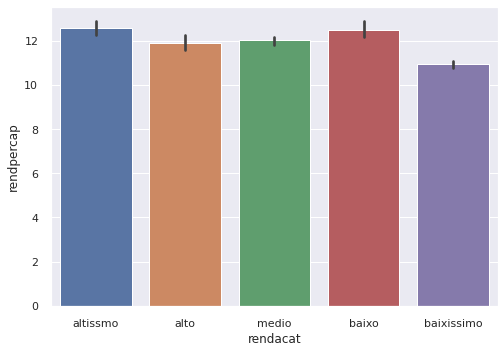

In [ ]:
sns.barplot(x = 'rendacat', y = 'rendpercap', data = df)
plt.show()

* O retorno per capita dos filmes é praticmante o mesmo para todas as categorias de rendimento

In [ ]:
df['rendpersala'] = df['renda'] / df['salas']
df.head(2)

,titulo_original,publico,renda,salas,copias,ano_cinematografico,razao_social_distribuidora,internacional_nacional,genero,tempo_exibicao2,distribuidoras2,rendacat,rendabinaria,rendpercap,rendpersala
0,OS DEZ MANDAMENTOS,11305479,116833026.879999995,7319,263,2016,SM DISTRIBUIDORA DE FILMES LTDA,Nacional,Ficção,222,media,altissmo,alto,10.334195206,15962.976756387
1,TROPA DE ELITE 2,11146723,103461153.739999995,6240,5674,2011,ZAZEN PRODUÇÕES AUDIOVISUAIS LTDA.,Nacional,Ficção,168,major,altissmo,alto,9.281755162,16580.313099359


In [ ]:
dfx = df.copy(deep = True)

In [ ]:
dfx['pubsala'] = df['publico'] / df['salas']
dfx.head(2)

,titulo_original,publico,renda,salas,copias,ano_cinematografico,razao_social_distribuidora,internacional_nacional,genero,tempo_exibicao2,distribuidoras2,rendacat,rendabinaria,rendpercap,rendpersala,pubsala
0,OS DEZ MANDAMENTOS,11305479,116833026.879999995,7319,263,2016,SM DISTRIBUIDORA DE FILMES LTDA,Nacional,Ficção,222,media,altissmo,alto,10.334195206,15962.976756387,1544.675365487
1,TROPA DE ELITE 2,11146723,103461153.739999995,6240,5674,2011,ZAZEN PRODUÇÕES AUDIOVISUAIS LTDA.,Nacional,Ficção,168,major,altissmo,alto,9.281755162,16580.313099359,1786.333814103


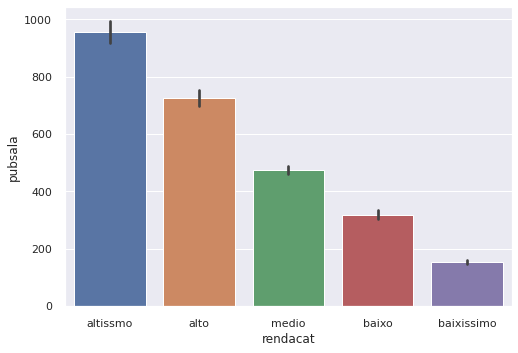

In [ ]:
sns.barplot(x = 'rendacat', y = 'pubsala', data = dfx)
plt.show()

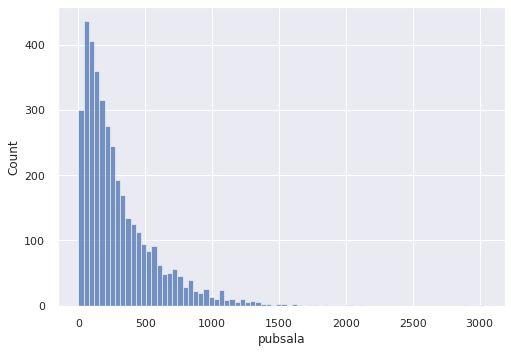

In [ ]:
sns.histplot(x = 'pubsala', data = dfx)
plt.show()

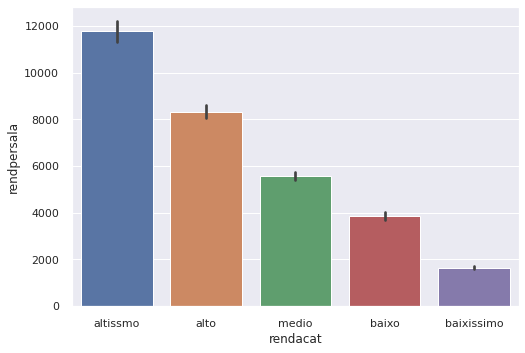

In [ ]:
sns.barplot(x = 'rendacat', y = 'rendpersala', data = df)
plt.show()

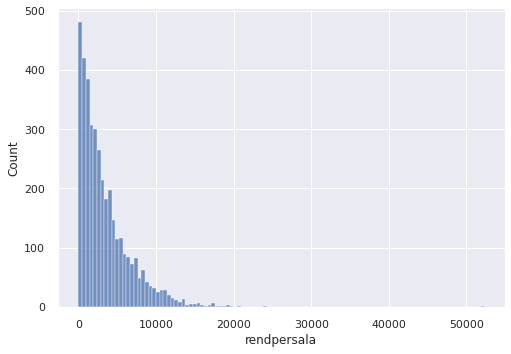

In [ ]:
sns.histplot(x = 'rendpersala', data = df)
plt.show()

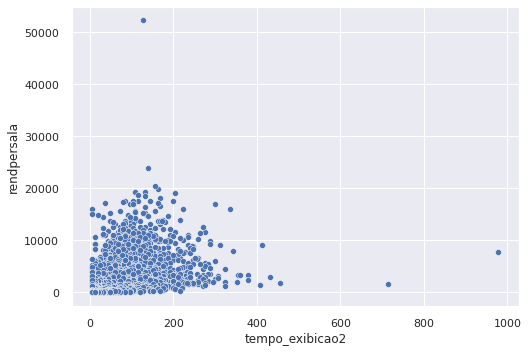

In [ ]:
sns.scatterplot(x = 'tempo_exibicao2', y = 'rendpersala', data = df)
plt.show()

In [ ]:
df['rendpersala'].describe()

count    3870.000000000
mean     3429.376654083
std      3305.121278477
min         0.000000000
25%      1027.588695261
50%      2460.190898058
75%      4786.359401892
max     52311.666666667
Name: rendpersala, dtype: float64

In [ ]:
alto = len(df[(df['rendpersala'] >= 3430)]) # acima da média
baixo = len(df[(df['rendpersala'] < 3430)]) # abaixo da média
print(alto)
print(baixo)

1457
2413


In [ ]:
conditions = [
    (df['rendpersala'] >= 3430),
    (df['rendpersala'] < 3430)
]

values = ['alto', 'baixo']

df['rendpersala2'] = np.select(conditions, values)

df.head(2)

,titulo_original,publico,renda,salas,copias,ano_cinematografico,razao_social_distribuidora,internacional_nacional,genero,tempo_exibicao2,distribuidoras2,rendacat,rendabinaria,rendpercap,rendpersala,rendpersala2
0,OS DEZ MANDAMENTOS,11305479,116833026.879999995,7319,263,2016,SM DISTRIBUIDORA DE FILMES LTDA,Nacional,Ficção,222,media,altissmo,alto,10.334195206,15962.976756387,alto
1,TROPA DE ELITE 2,11146723,103461153.739999995,6240,5674,2011,ZAZEN PRODUÇÕES AUDIOVISUAIS LTDA.,Nacional,Ficção,168,major,altissmo,alto,9.281755162,16580.313099359,alto


* Essa variável talvez reflita melhora capacidade de lotação de cada filme...
Dá pra tentar modelar com ela

# Modelo 15 ("tradicional")

## Preparação dos dados e definição do modelo

In [ ]:
df5 = df.copy(deep = True)

In [ ]:
df5['rendpersala2'] = df5['rendpersala2'].map( {'alto': 1, 'baixo': 0})

In [ ]:
df5 = pd.get_dummies(df5, columns=['internacional_nacional', 'genero', 'distribuidoras2'])

In [ ]:
df5.drop(columns=['copias', 'publico', 'ano_cinematografico', 'razao_social_distribuidora', 'titulo_original', 
                  'internacional_nacional_Internacional', 'genero_Documentário', 'genero_Não Classificada', 
                  'genero_Vídeomusical', 'rendacat', 'renda', 'salas', 'rendabinaria', 'rendpercap', 'rendpersala'], inplace=True)
df5.head(2)

,tempo_exibicao2,rendpersala2,internacional_nacional_Nacional,genero_Animação,genero_Ficção,distribuidoras2_major,distribuidoras2_media,distribuidoras2_menores
0,222,1,1,0,1,0,1,0
1,168,1,1,0,1,1,0,0


In [ ]:
m15 = smf.logit("rendpersala2 ~ tempo_exibicao2 + C(internacional_nacional_Nacional) + C(genero_Animação) + C(genero_Ficção) + C(distribuidoras2_major) + C(distribuidoras2_media)", data = df5).fit()

m15.summary()

Optimization terminated successfully.
         Current function value: 0.475555
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           rendpersala2   No. Observations:                 3870
Model:                          Logit   Df Residuals:                     3863
Method:                           MLE   Df Model:                            6
Date:                Fri, 30 Sep 2022   Pseudo R-squ.:                  0.2820
Time:                        18:11:47   Log-Likelihood:                -1840.4
converged:                       True   LL-Null:                       -2563.2
Covariance Type:            nonrobust   LLR p-value:                3.338e-309
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                  -2.6571      0.182    -14.562      0.000      -3.015      -2.300
C(internacional_nacional_Nacional)[T.1]    -1.2348      0.108    -11.424      0.000      -1.447      -1.023
C(genero_Animação)[T.1]                    -0.3163      0.240     -1.318      0.187      -0.786       0.154
C(genero_Ficção)[T.1]                       0.5607      0.176      3.186      0.001       0.216       0.906
C(distribuidoras2_major)[T.1]               2.7250      0.119     22.982      0.000       2.493       2.957
C(distribuidoras2_media)[T.1]               2.1793      0.096     22.769      0.000       1.992       2.367
tempo_exibicao2                             0.0078      0.001     10.684      0.000       0.006       0.009
===========================================================================================================
"""

In [ ]:
m15_odds = pd.DataFrame(np.exp(m15.params), columns= ['OR'])
m15_odds['z-value']= m15.pvalues
m15_odds[['2.5%', '97.5%']] = np.exp(m15.conf_int())

m15_odds

,OR,z-value,2.5%,97.5%
Intercept,0.070148675,0.000000000,0.049057323,0.100307891
C(internacional_nacional_Nacional)[T.1],0.290906260,0.000000000,0.235368243,0.359549150
C(genero_Animação)[T.1],0.728873733,0.187417548,0.455455463,1.166430008
C(genero_Ficção)[T.1],1.751862804,0.001442422,1.240808707,2.473405665
C(distribuidoras2_major)[T.1],15.257119987,0.000000000,12.093257743,19.248718190
C(distribuidoras2_media)[T.1],8.840341340,0.000000000,7.328204564,10.664499649
tempo_exibicao2,1.007837915,0.000000000,1.006395494,1.009282403


## Análise de resíduos (modelo 15)

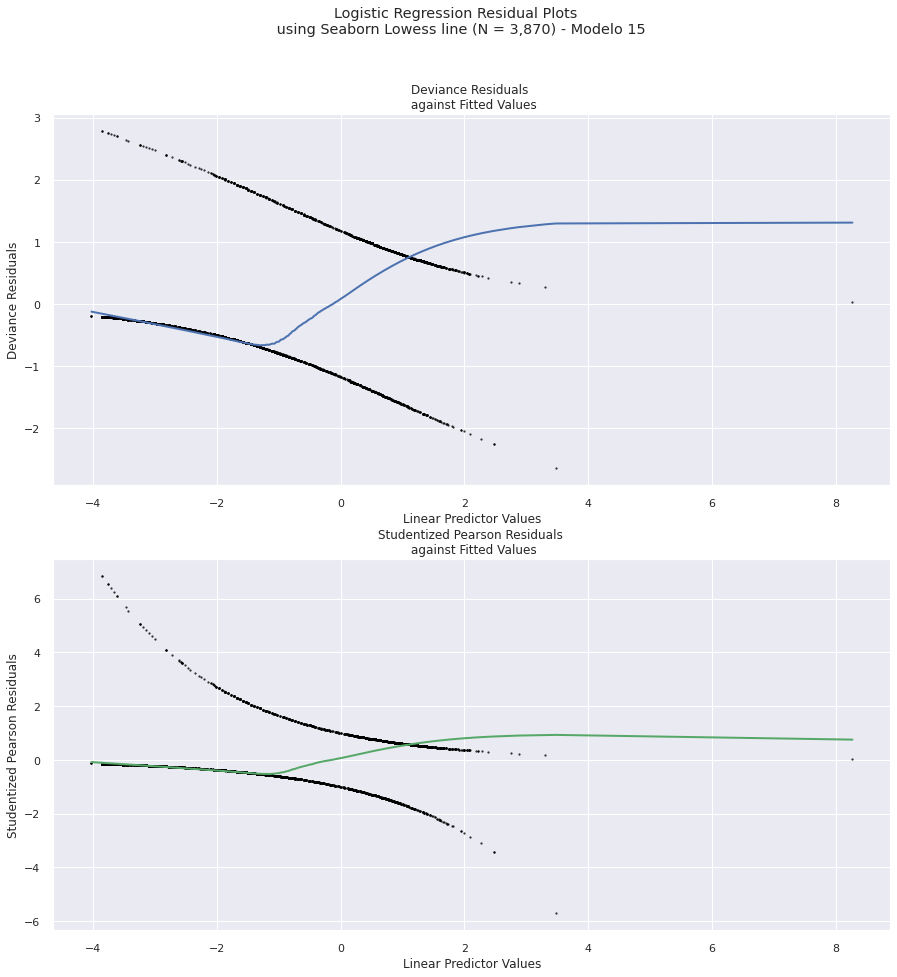

In [ ]:
## Testar com o modelo 15, Rendimento por sala como target

fig, (axL, axR) = plt.subplots(2, figsize=(15, 15))
plt.suptitle("Logistic Regression Residual Plots \n using Seaborn Lowess line (N = 3,870) - Modelo 15")


# Deviance Residuals
sns.regplot(m15.fittedvalues, m15.resid_dev, ax= axL,
            color="black", scatter_kws={"s": 5},
            line_kws={"color":"b", "alpha":1, "lw":2}, lowess=True)

axL.set_title("Deviance Residuals \n against Fitted Values")
axL.set_xlabel("Linear Predictor Values")
axL.set_ylabel("Deviance Residuals")

# Studentized Pearson Residuals
sns.regplot(m15.fittedvalues, m15.resid_pearson, ax= axR,
            color="black", scatter_kws={"s": 5},
            line_kws={"color":"g", "alpha":1, "lw":2}, lowess=True)

axR.set_title("Studentized Pearson Residuals \n against Fitted Values")
axR.set_xlabel("Linear Predictor Values")
axR.set_ylabel("Studentized Pearson Residuals")

plt.show()

- Está melhor do que o outro mesmo com o tempo de exbição porque com o rendimento por sala a relação como tempod e exbição parece ser ligeiramente linear

# Modelo 16 (Treino e teste)

In [ ]:
# defining the dependent and independent variables - COM RENDPERSALA
Xtrain3 = df5[['tempo_exibicao2', 'internacional_nacional_Nacional', 'genero_Animação', 'genero_Ficção', 'distribuidoras2_major', 'distribuidoras2_media']]
ytrain3 = df5[['rendpersala2']]

   
# building the model and fitting the data
log_reg3 = sm.Logit(ytrain3, Xtrain3).fit()

Optimization terminated successfully.
         Current function value: 0.514338
         Iterations 6


In [ ]:
print(log_reg3.summary())

                           Logit Regression Results                           
Dep. Variable:           rendpersala2   No. Observations:                 3870
Model:                          Logit   Df Residuals:                     3864
Method:                           MLE   Df Model:                            5
Date:                Fri, 30 Sep 2022   Pseudo R-squ.:                  0.2234
Time:                        18:11:51   Log-Likelihood:                -1990.5
converged:                       True   LL-Null:                       -2563.2
Covariance Type:            nonrobust   LLR p-value:                2.002e-245
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
tempo_exibicao2                     0.0042      0.001      6.336      0.000       0.003       0.006
internacional_nacional_Nacional    -1.9658      0.095    -20.593    

In [ ]:
# defining the dependent and independent variables
Xtest3 = df5[['tempo_exibicao2', 'internacional_nacional_Nacional', 'genero_Animação', 'genero_Ficção', 'distribuidoras2_major', 'distribuidoras2_media']]
ytest3 = df5['rendpersala2']
  
# performing predictions on the test datdaset
yhat3 = log_reg3.predict(Xtest3)
prediction3 = list(map(round, yhat3))
  
# comparing original and predicted values of y
print('Actual values', list(ytest3.values))
print('Predictions :', prediction3)

Actual values [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [ ]:
# confusion matrix
cm3 = confusion_matrix(ytest3, prediction3) 
print ("Confusion Matrix : \n", cm3) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(ytest3, prediction3))

Confusion Matrix : 
 [[1807  606]
 [ 393 1064]]
Test accuracy =  0.7418604651162791
